<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="google.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Google Play Store </b>
                    <b> - Apps Clustering, Analysis & App Recommendation  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Problem Statement:

The Google Play Store is a digital distribution service operated and developed by Google. It serves as the official app store for certified devices running on the Android operating system and its derivatives as well as Chrome OS, allowing users to browse and download applications developed with the Android software development kit (SDK) and published through Google. Google Play also serves as a digital media store, offering music, books, movies, magzines and television programs. 

Android is an operating system expanding throughout the years. It has aquired 71.93%, highest market share worldwide on mobile devices which is a true indicator of the huge amount of population using android. Our goal is to help and recommend the android developers to know what are the motivating factors for people to download an app. It will also help to find out the factors that affect someone’s decision to download an app. We would like to analyse category, reviews, price, ratings and installs for this purpose and find out how they are inter related and help in recommending the app's.

# Data Definition:

Here's a brief version of what you'll find in the data

**App**: Name of the App

**Category**: Category of the app

**Rating**: Over all user rating of the app out of 5 on teh Play Store

**Reviews**: Number of user reviews for the app

**Size**: Size of app

**Price**: Cost of the App
    
**Installs**: Number of user downloads/installs for the app

**Content Rating**: Age group the app is targeted at

**Type**: Paid or Free

**Genres**: An app can belong to multiple genres (apart from its main category)

**Last Updated**: Date when the app was last updated on Play Store
    
**Current Ver**: Current version of the app available on Play Store

**Android Ver**: Minimum required Android Version


## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
3. **[Clustering](#clustering)**     
4. **[Dimensionality Reduction](#dimension)**
5. **[Recommendation System](#System)**
6. **[Conclusion](#con)**

<a id="lib"></a>
# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples,accuracy_score,classification_report,confusion_matrix
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from scipy.cluster.hierarchy import linkage,dendrogram,cophenet
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold,train_test_split
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import KernelPCA
from sklearn.metrics import explained_variance_score,make_scorer
import prince
from sklearn.metrics import make_scorer
from sklearn.neighbors import NearestNeighbors
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from scipy.sparse.linalg import svds
from sklearn.decomposition import TruncatedSVD
plt.rcParams['figure.figsize'] = [15,8]
plt.rcParams.update({'font.size': 10})

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read Data

#### Read the dataset and print the first five observations.

In [14]:
df=pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Data Dimesnion

In [3]:
df.shape

(10841, 13)

**Interpretation:** We see the dataframe has 13 variables and 10841 observations.

<a id="dtype"></a>
## 2.2 Check the Data Type

In [4]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**Interpretation:** All the variables are object except Rating. The variables `Reviews` & `Price` is categorical as per the data definition, but they considered as an interger. 

Change the data type of `Reviews` & `Price` to numerical in futher data processing.

<a id="drop"></a>
## 2.3 Remove Insignificant Variables

The columns `Last Updated`,`Current Ver`,`Android Ver`,`Category` are not necessary for further analysis. Thus, we drop these columns.

In [15]:
df=df.drop(['Last Updated','Current Ver','Android Ver','Category'],axis=1)

In [16]:
df.shape

(10841, 9)

### Data cleaning and preprocessing:

Below are the some data preprocessing steps and converting datatype of variables `Size`, `Reviews`, `Price` for our analysis

In [17]:
df.Size=df.Size.str.replace('M','MB')
df.Size=df.Size.str.replace('k','KB')

In [18]:
df.Reviews=df.Reviews.str.replace('.0M','000000')

In [19]:
df.Reviews=df.Reviews.astype('int64')

In [20]:
df.Type.value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [21]:
df=df[~(df.Price=='Everyone')]

In [22]:
df.Price=df.Price.str.replace('$','')
df.Price=df.Price.astype('float64')

In [23]:
df.dtypes

App                object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
dtype: object

<a id="null"></a>
## 2.5 Missing Value Treatment

In [24]:
df.isnull().sum()

App                  0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
dtype: int64

The missing values are present in the data for the `Rating` and `Type` variables. There are 1474 missing values for the variable `Rating` and 1 missing value for the variable `Type`

### Visualize Missing Values using Heatmap

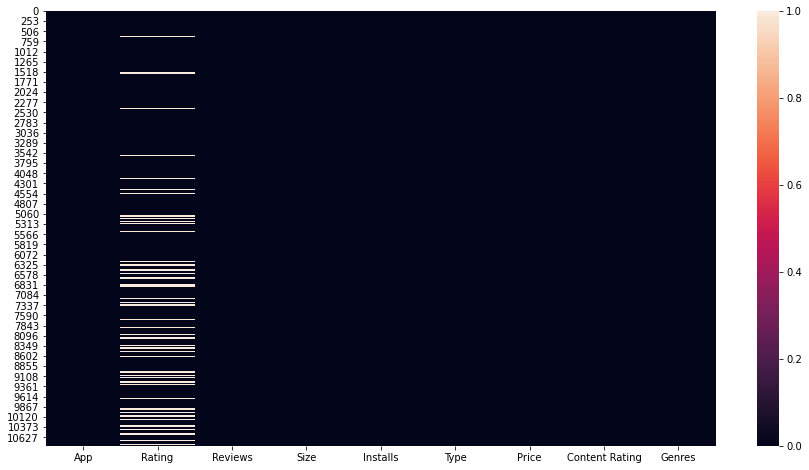

In [25]:
sns.heatmap(df.isnull())
plt.show()

In [26]:
df['Rating'].fillna(df['Rating'].mean(),inplace=True)
df['Type'].fillna(method='ffill',inplace=True)

Replacing the missing values by mean for the `Rating` and Replacing the missing values for `Type` by forwardfill using fillna function

In [27]:
df.isnull().sum()

App               0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

**Interpretation:** The above output shows that there are no more missing values in the data.

## Duplicate values

In [28]:
df.duplicated().sum()

491

The output shows there are 491 duplicate records in the dataset which are required to drop.

In [29]:
df=df.drop_duplicates()

In [30]:
print(df.duplicated().sum())
df.shape

0


(10349, 9)

**Interpretation:** The above output shows that the duplicate records have been droped and the number of records have been reduced to 10349

###  Seperating the numerical and categorical columns

In [31]:
df_num=df.select_dtypes(exclude='object')
df_num.columns

Index(['Rating', 'Reviews', 'Price'], dtype='object')

In [32]:
df_cat=df.select_dtypes(include='object')
df_cat.columns

Index(['App', 'Size', 'Installs', 'Type', 'Content Rating', 'Genres'], dtype='object')

## 2.6 Outlier Treatment

In [33]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1
IQR

Rating         0.4
Reviews    46210.0
Price          0.0
dtype: float64

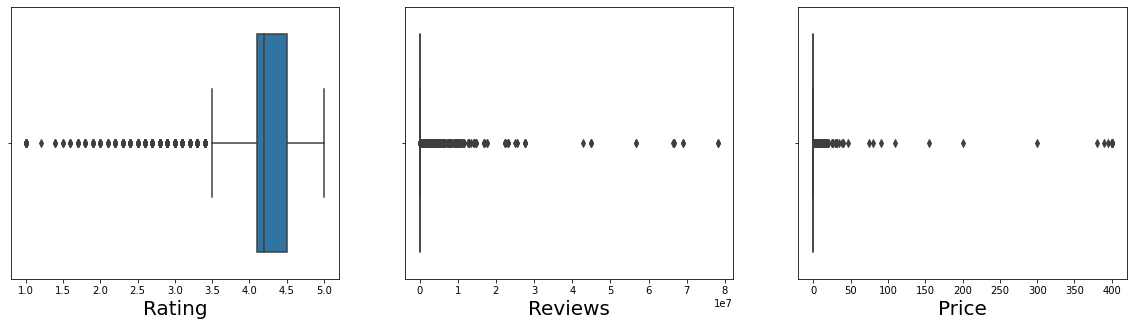

In [34]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot)
    z.set_xlabel(variable, fontsize = 20)

**Interpretation:** The above output shows there are outliers in the dataset, since the `Reviews`,`Rating` and `Price` are important factors for analysis the same have not been treated.

<a id='Summary_Statistics'></a>
## 2.7 Statistics Summary 

**1. For numerical variables:**

In [35]:
df_num.describe()

,Rating,Reviews,Price
count,10349.000000,1.034900e+04,10349.000000
mean,4.188243,4.057403e+05,1.031018
std,0.484125,2.697513e+06,16.284821
min,1.000000,0.000000e+00,0.000000
25%,4.100000,3.200000e+01,0.000000
50%,4.200000,1.664000e+03,0.000000
75%,4.500000,4.624200e+04,0.000000
max,5.000000,7.815831e+07,400.000000


The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation.
Note, the average Rating of an app is `4.2`. The Reviews are between `0` to `78158306`. Here the minimum Price of an app is `0` Dollars and  the maximum Price is `400.00` Dollars.<br><br>

**2. For categorical variables:**

In [36]:
df_cat.describe()

,App,Size,Installs,Type,Content Rating,Genres
count,10349,10349,10349,10349,10349,10349
unique,9659,461,21,2,6,119
top,ROBLOX,Varies with device,"1,000,000+",Free,Everyone,Tools
freq,8,1525,1487,9585,8376,841


From the above, there are 9659 unique `apps` from 119 different `Genres`. The top most app downloaded is `ROBLOX` from `Tools` Genre where the rating for this app given by `Everyone` and is of `Free` type. 

### Correlation using Heatmap:

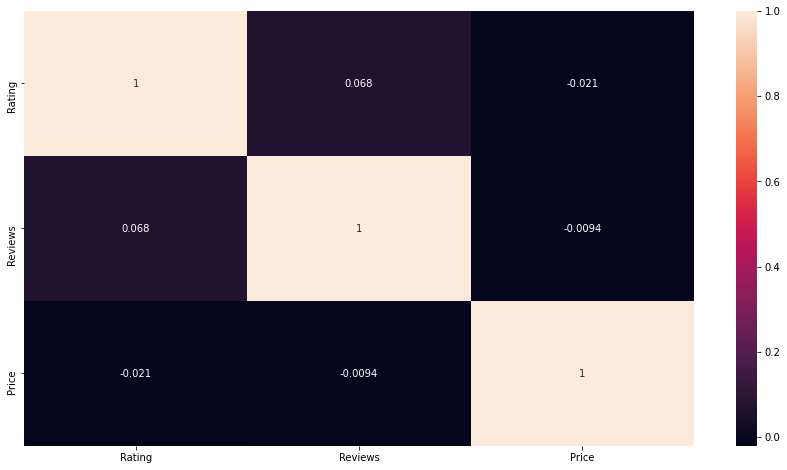

In [37]:
sns.heatmap(df_num.corr(),annot=True)
plt.show()

From the above heatmap, it can be observed that the numeric variables are not correlated with each other since all the correlation coefficients are close to zero. It implies that there is no multicollinearity in the data.

#### Setting the index as 'App' for future anaysis

In [29]:
df_sp=df.set_index('App')

In [30]:
X_filtered=df_sp[['Rating','Reviews','Price']]
X_filtered.head()

,Rating,Reviews,Price
App,,,
Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,0.0
Coloring book moana,3.9,967,0.0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",4.7,87510,0.0
Sketch - Draw & Paint,4.5,215644,0.0
Pixel Draw - Number Art Coloring Book,4.3,967,0.0


## Scaling the Data

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [31]:
ss=StandardScaler()
X_Scaled=ss.fit_transform(X_filtered)
X=pd.DataFrame(X_Scaled,columns=X_filtered.columns,index=X_filtered.index)
X.head()

,Rating,Reviews,Price
App,,,
Photo Editor & Candy Camera & Grid & ScrapBook,-0.182282,-0.150361,-0.063315
Coloring book moana,-0.595418,-0.150062,-0.063315
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",1.057129,-0.117977,-0.063315
Sketch - Draw & Paint,0.643992,-0.070474,-0.063315
Pixel Draw - Number Art Coloring Book,0.230855,-0.150062,-0.063315


We perform clustering on the variables `Rating`, `Reviews` and `Price` as these variables are important factors for android users that help in downloading any app.

<a id="clustering"></a>
# 3. Clustering

## K-Means Clustering

Let us perform the centroid-based clustering algorithm (i.e. K-Means). Such algorithms are efficient but sensitive to initial conditions and outliers. K-means is the most widely-used centroid-based clustering algorithm.

Here we consider two techniques (elbow/scree plot and Silhouette score) to decide the optimal value of `K` to perform the K-means clustering.

## Optimal Value of K Using Elbow Plot

Elbow plot is plotted with the value of K on the x-axis and the WCSS (Within Cluster Sum of Squares) on the y-axis. The value of K corresponding to the elbow point represents the optimal value for K.

In [32]:
wcss  = []
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

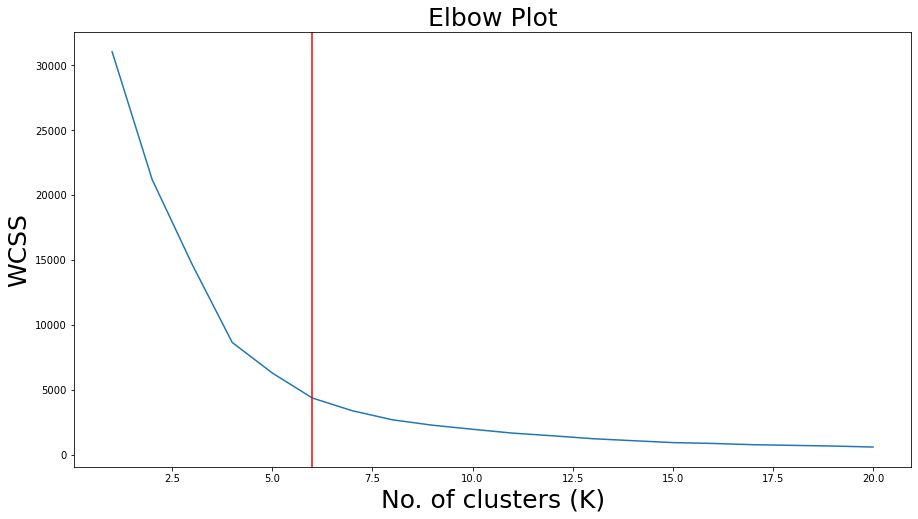

In [33]:
plt.plot(range(1,21), wcss)
plt.title('Elbow Plot', fontsize = 25)
plt.xlabel('No. of clusters (K)', fontsize = 25)
plt.ylabel('WCSS', fontsize = 25)
plt.axvline(x = 6, color = 'red')
plt.show()

**Interpretation:** We can see that the for K = 6, there is an elbow in the plot. Before this elbow point, the WCSS is decreasing rapidly and after K = 6, the WCSS is decreasing slowly.

Now, let us use the silhouette score method to identify the optimal value of K.

## Optimal Value of K Using Silhouette Score

The Silhouette score can also be used to identify the optimal number of clusters. We plot the Silhouette score for different values of K. The `K` with the highest Silhouette score represents the optimal value for the number of clusters (K).

In [34]:
n_clusters = range(2,11)
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(X)
    score = silhouette_score(X, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.948412656780626)
For 3 clusters the silhouette score is 0.9211652166251115)
For 4 clusters the silhouette score is 0.6153912297432281)
For 5 clusters the silhouette score is 0.6546409987734707)
For 6 clusters the silhouette score is 0.5165541873326246)
For 7 clusters the silhouette score is 0.5128846630350855)
For 8 clusters the silhouette score is 0.5413588403391412)
For 9 clusters the silhouette score is 0.5384521274511371)
For 10 clusters the silhouette score is 0.5291510582314946)


#### Visualize the silhouette scores

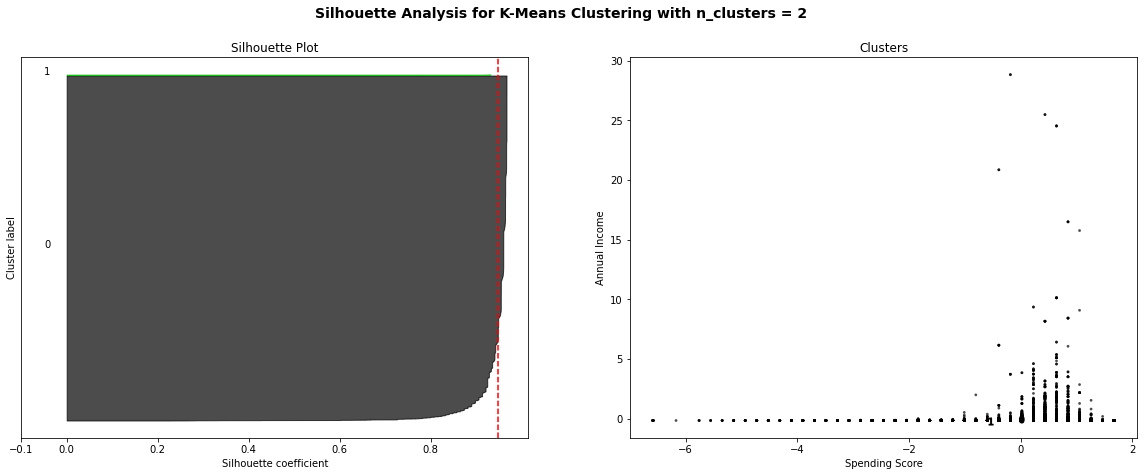

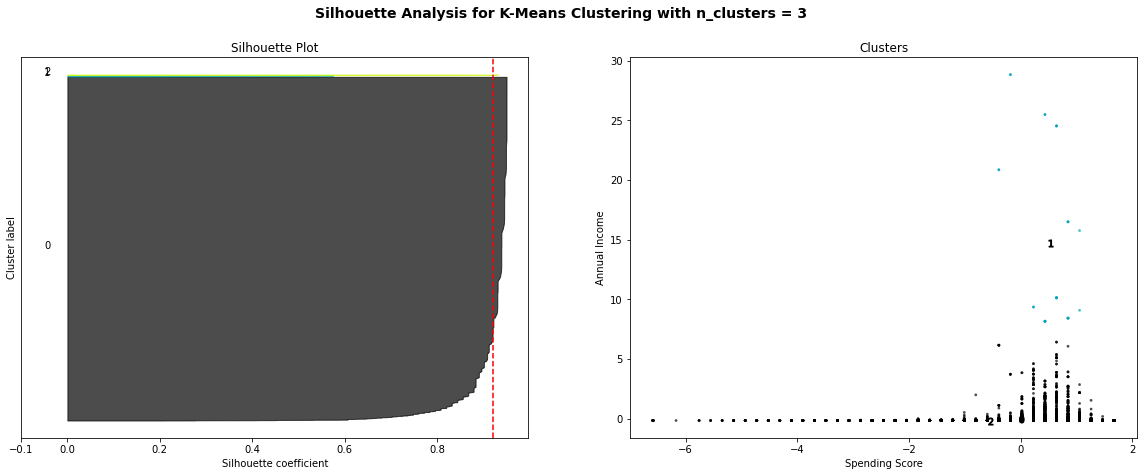

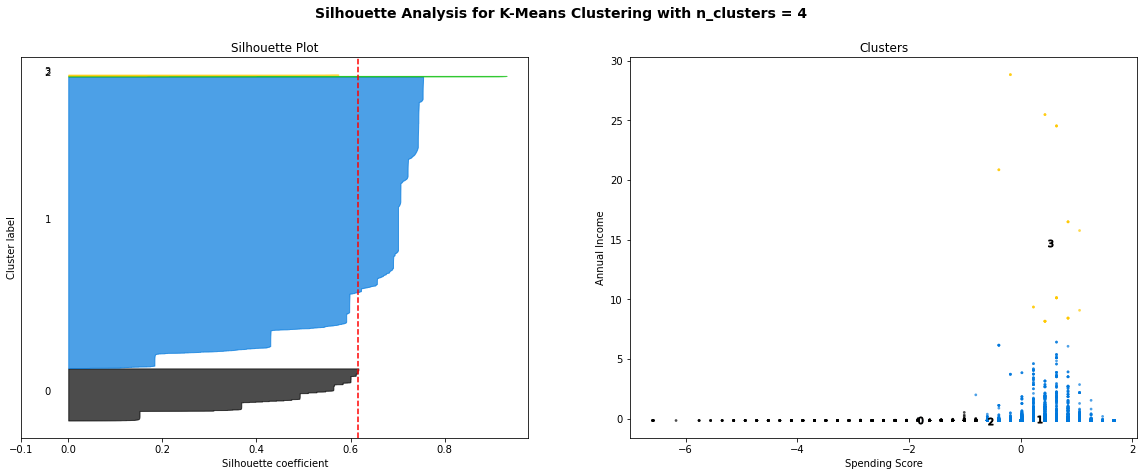

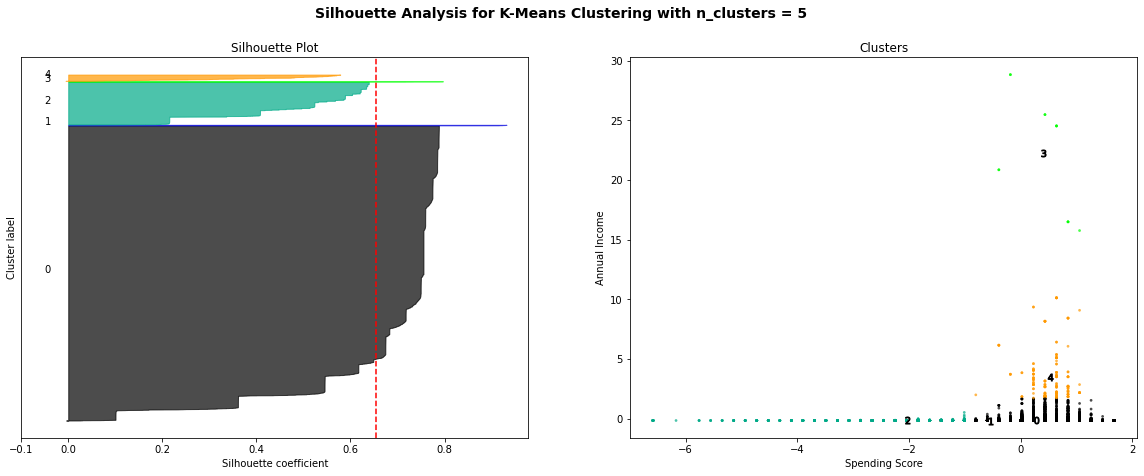

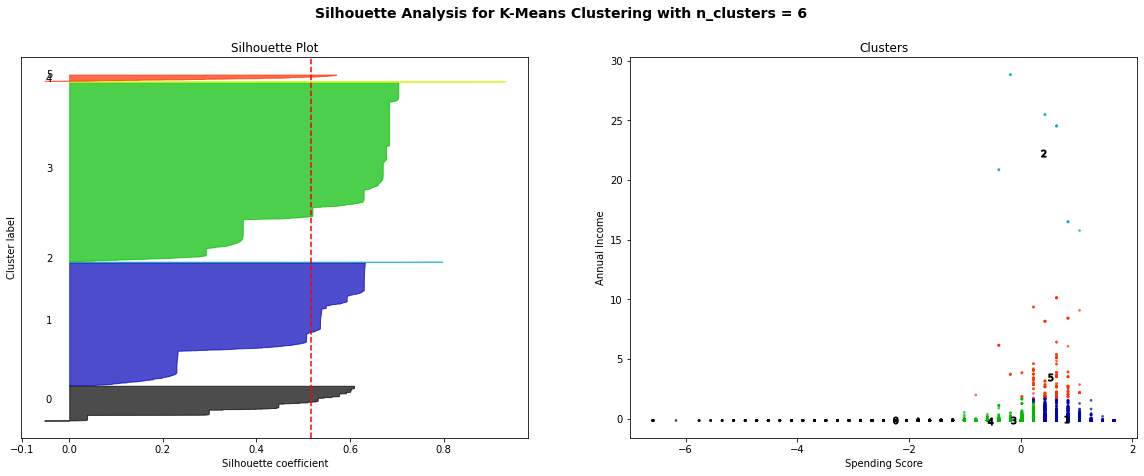

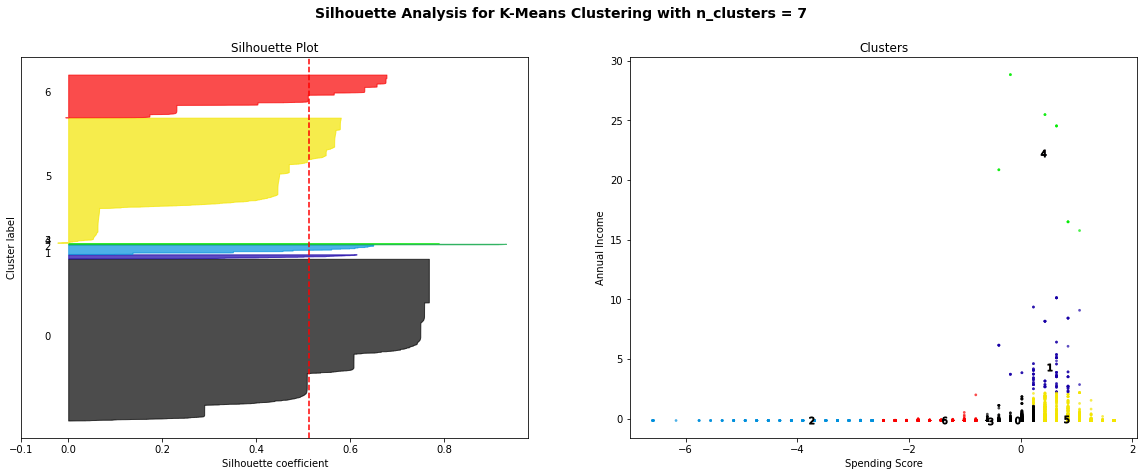

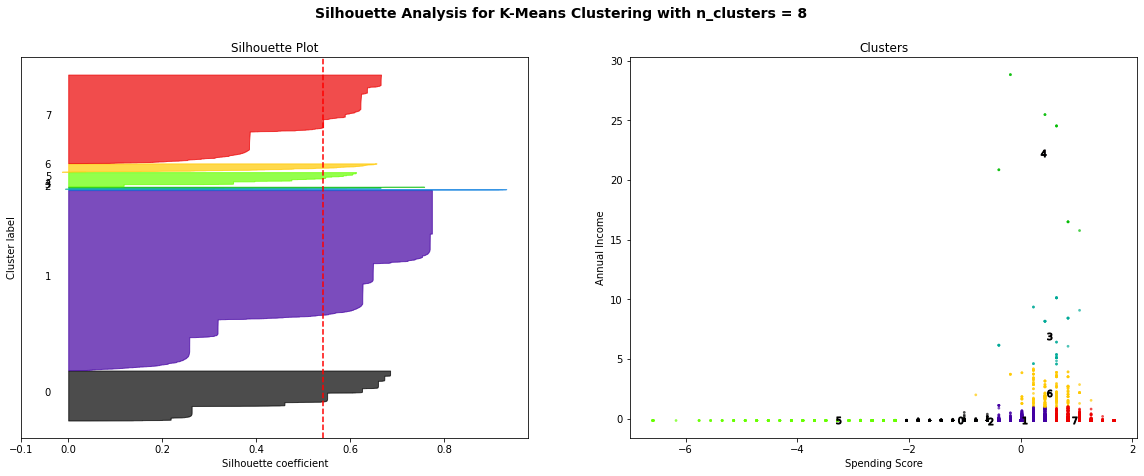

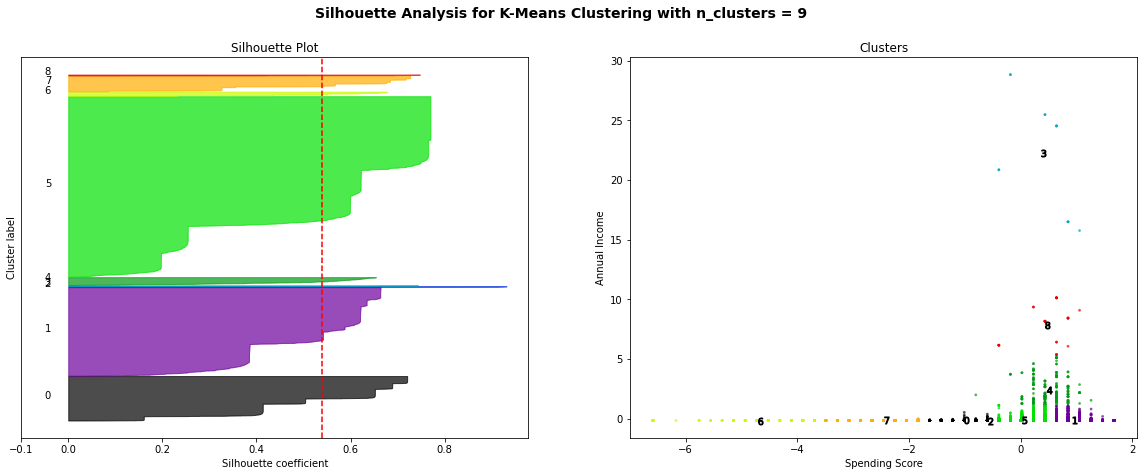

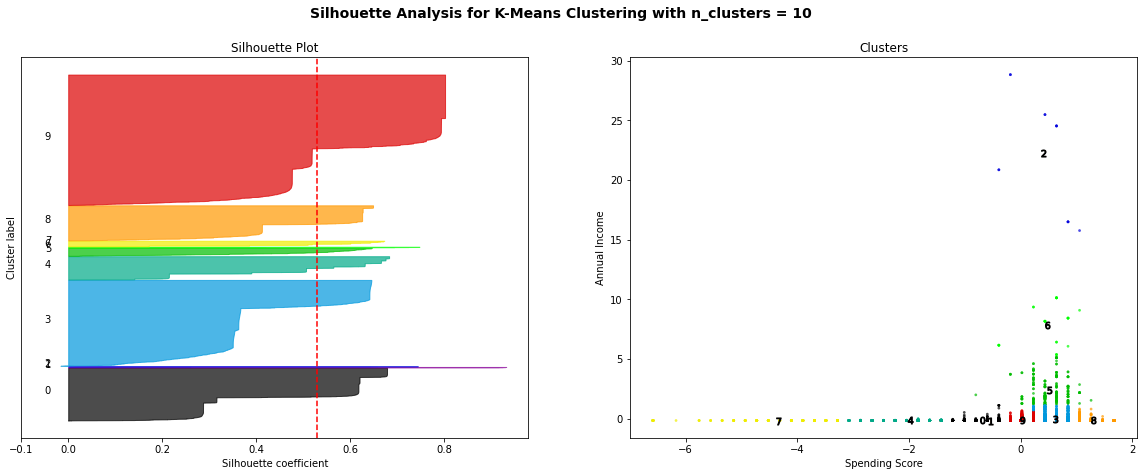

In [35]:
n_clusters = range(2,11)
X = np.array(X)
for K in n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(20, 7)
    model = KMeans(n_clusters = K, random_state = 10)
    cluster_labels = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(K):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i 
        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])   
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    centers = model.cluster_centers_
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title("Clusters")
    ax2.set_xlabel("Spending Score")
    ax2.set_ylabel("Annual Income")
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14, 
                 fontweight='bold')
plt.show()

**Interpretation:** The above plot shows the silhouette plot and the clusters formed for each value of K. The plot shows that there are outliers (where the silhouette coefficient is less than 0) for K = 5,6,7,9,10. Also for K = 10, the 10th cluster has the silhouette score less than the average silhouette score. Thus we can not consider the K values as 2,3,4,5,7,10. 


## Build the Cluster

In [36]:
df_cust=df.copy()
new_clusters = KMeans(n_clusters = 6, random_state = 10)
new_clusters.fit(X)
df_cust['Cluster'] = new_clusters.labels_
df_cust.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Cluster
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19MB,"10,000+",Free,0.0,Everyone,Art & Design,3
1,Coloring book moana,3.9,967,14MB,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7MB,"5,000,000+",Free,0.0,Everyone,Art & Design,1
3,Sketch - Draw & Paint,4.5,215644,25MB,"50,000,000+",Free,0.0,Teen,Art & Design,1
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8MB,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,3


In [37]:
df_cust.Cluster.value_counts()

3    5386
1    3697
0    1045
5     190
4      18
2      13
Name: Cluster, dtype: int64

### Bar-Plot to visualize the Cluster Size

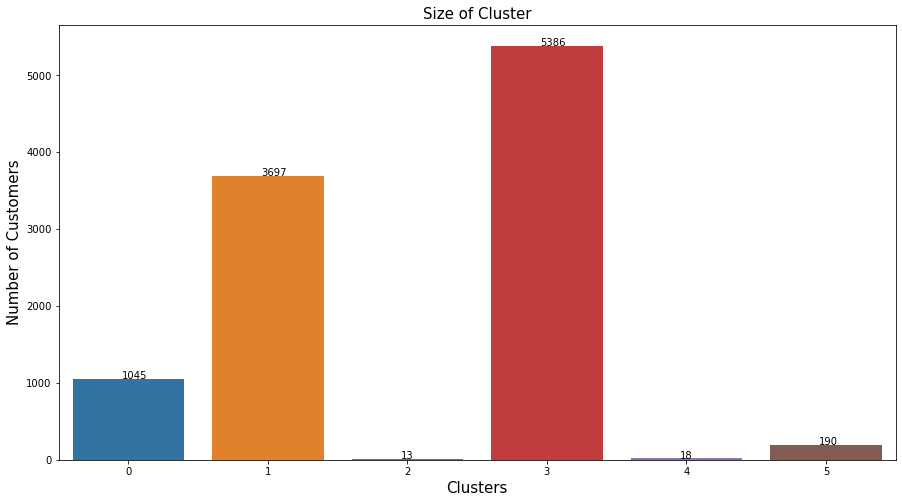

In [38]:
sns.countplot(data= df_cust, x = 'Cluster')
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)
plt.text(x = -0.05, y =1050, s = np.unique(new_clusters.labels_, return_counts=True)[1][0])
plt.text(x = 0.95, y =3700, s = np.unique(new_clusters.labels_, return_counts=True)[1][1])
plt.text(x = 1.95, y =15, s = np.unique(new_clusters.labels_, return_counts=True)[1][2])
plt.text(x = 2.95, y =5387, s = np.unique(new_clusters.labels_, return_counts=True)[1][3])
plt.text(x = 3.95, y =20, s = np.unique(new_clusters.labels_, return_counts=True)[1][4])
plt.text(x = 4.95, y =191, s = np.unique(new_clusters.labels_, return_counts=True)[1][5])

plt.show()

**Interpretation:** The 710 cluster is the largest cluster containing 5386 observations.


## Analyze the Cluster

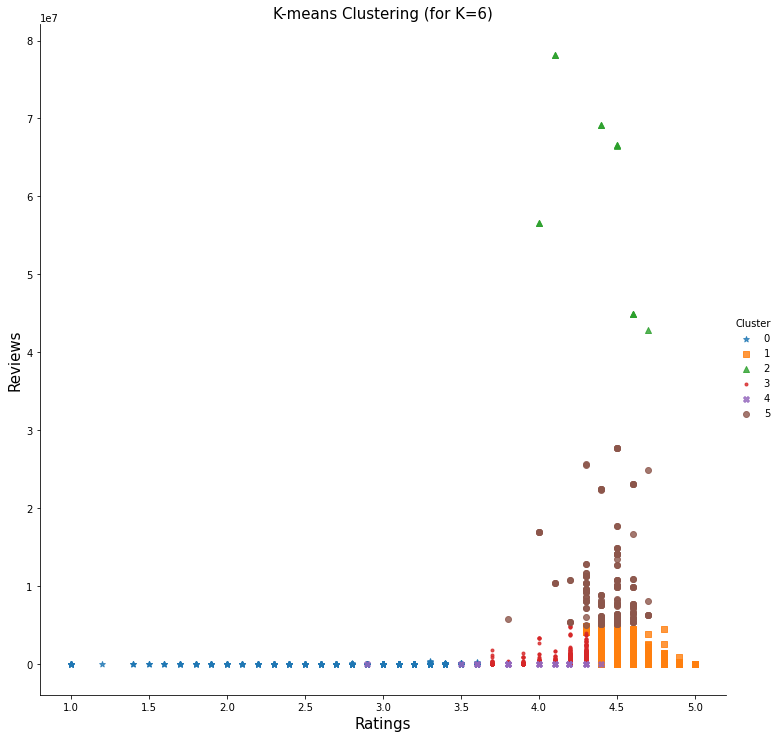

In [39]:
sns.lmplot(x = 'Rating', y = 'Reviews', data = df_cust, hue = 'Cluster', 
                markers = ['*', ',', '^', '.','X','o'], fit_reg = False, size = 10)
plt.title('K-means Clustering (for K=6)', fontsize = 15)
plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('Reviews', fontsize = 15)
plt.show()

### Cluster 1


In [40]:
len(df_cust[df_cust['Cluster'] == 0])

1045

In [41]:
df_cust[df_cust.Cluster==0].describe()

,Rating,Reviews,Price,Cluster
count,1045.000000,1045.000000,1045.000000,1045.0
mean,3.097990,6547.246890,0.347923,0.0
std,0.543021,27970.284553,2.048516,0.0
min,1.000000,1.000000,0.000000,0.0
25%,2.900000,30.000000,0.000000,0.0
50%,3.300000,191.000000,0.000000,0.0
75%,3.500000,1691.000000,0.000000,0.0
max,3.600000,381023.000000,33.990000,0.0


In [42]:
df_cust[df_cust.Cluster==0].describe(include = object)

,App,Size,Installs,Type,Content Rating,Genres
count,1045,1045,1045,1045,1045,1045
unique,1038,220,16,2,4,55
top,stranger chat - anonymous chat,Varies with device,"10,000+",Free,Everyone,Tools
freq,2,70,200,978,895,142


**Interpretation:** The above summary shows that the average Rating of the Apps in this cluster is 3.3. On average,they get 6547 reviews.`McDonalds` is the top App in this Cluster.


### Cluster 2

In [43]:
len(df_cust[df_cust['Cluster'] == 1])

3697

In [44]:
df_cust[df_cust.Cluster==1].describe()

,Rating,Reviews,Price,Cluster
count,3697.000000,3.697000e+03,3697.000000,3697.0
mean,4.582716,2.793805e+05,0.394847,1.0
std,0.175213,7.474867e+05,2.154909,0.0
min,4.300000,1.000000e+00,0.000000,1.0
25%,4.400000,1.330000e+02,0.000000,1.0
50%,4.500000,8.600000e+03,0.000000,1.0
75%,4.700000,1.365400e+05,0.000000,1.0
max,5.000000,4.972230e+06,79.990000,1.0


In [45]:
df_cust[df_cust.Cluster==1].describe(include = object)

,App,Size,Installs,Type,Content Rating,Genres
count,3697,3697,3697,3697,3697,3697
unique,3388,245,19,2,5,96
top,ROBLOX,Varies with device,"1,000,000+",Free,Everyone,Education
freq,8,627,580,3362,3003,242


**Interpretation:** The above summary shows that the average Rating of the Apps in this cluster is 4.5. On an average,they get 2794 reviews.`ROBLOX` is the top App in this Cluster.


### Cluster 3

In [46]:
len(df_cust[df_cust['Cluster'] == 2])

13

In [47]:
df_cust[df_cust.Cluster==2].describe()

,Rating,Reviews,Price,Cluster
count,13.000000,1.300000e+01,13.0,13.0
mean,4.384615,6.038871e+07,0.0,2.0
std,0.247811,1.275026e+07,0.0,0.0
min,4.000000,4.291653e+07,0.0,2.0
25%,4.100000,4.489389e+07,0.0,2.0
50%,4.500000,6.650992e+07,0.0,2.0
75%,4.600000,6.910967e+07,0.0,2.0
max,4.700000,7.815831e+07,0.0,2.0


In [48]:
df_cust[df_cust.Cluster==2].describe(include = object)

,App,Size,Installs,Type,Content Rating,Genres
count,13,13,13,13,13,13
unique,6,2,3,1,3,4
top,Instagram,Varies with device,"1,000,000,000+",Free,Everyone,Social
freq,3,10,9,13,5,5


**Interpretation:** The above summary shows that the average Rating of the Apps in this cluster is 4.2. On an average,they get 6039 reviews.`Clash of Clans` is the top App in this Cluster.


### Cluster 4

In [49]:
len(df_cust[df_cust['Cluster'] == 3])

5386

In [50]:
df_cust[df_cust.Cluster==3].describe()

,Rating,Reviews,Price,Cluster
count,5386.000000,5.386000e+03,5386.000000,5386.0
mean,4.120488,9.051352e+04,0.367961,3.0
std,0.161704,3.483941e+05,3.602004,0.0
min,3.700000,0.000000e+00,0.000000,3.0
25%,4.000000,9.000000e+00,0.000000,3.0
50%,4.191757,8.005000e+02,0.000000,3.0
75%,4.200000,2.663700e+04,0.000000,3.0
max,4.300000,4.928420e+06,154.990000,3.0


In [51]:
df_cust[df_cust.Cluster==3].describe(include = object)

,App,Size,Installs,Type,Content Rating,Genres
count,5386,5386,5386,5386,5386,5386
unique,5140,363,21,2,6,105
top,Helix Jump,Varies with device,"1,000,000+",Free,Everyone,Tools
freq,6,727,802,5042,4326,455


**Interpretation:** The above summary shows that the average Rating of the Apps in this cluster is 4.1. On average,they get 90514 reviews.`Helix Jump` is the top App in this Cluster.


### Cluster 5

In [52]:
len(df_cust[df_cust['Cluster'] == 4])

18

In [53]:
df_cust[df_cust.Cluster==4].describe()

,Rating,Reviews,Price,Cluster
count,18.000000,18.000000,18.000000,18.0
mean,3.920848,502.722222,381.380000,4.0
std,0.367627,887.214664,51.040366,0.0
min,2.900000,0.000000,200.000000,4.0
25%,3.800000,37.250000,396.240000,4.0
50%,4.000000,190.500000,399.990000,4.0
75%,4.191757,456.750000,399.990000,4.0
max,4.400000,3547.000000,400.000000,4.0


In [54]:
df_cust[df_cust.Cluster==4].describe(include = object)

,App,Size,Installs,Type,Content Rating,Genres
count,18,18,18,18,18,18
unique,18,17,7,1,2,4
top,I Am Rich,2.7MB,"10,000+",Paid,Everyone,Finance
freq,1,2,5,18,17,7


**Interpretation:** The above summary shows that the average Rating of the Apps in this cluster is 3.9. On average,they get 502 reviews.`💎 I'm rich` is the top App in this Cluster.


### Cluster 6

In [55]:
len(df_cust[df_cust['Cluster'] == 5])

190

In [56]:
df_cust[df_cust.Cluster==5].describe()

,Rating,Reviews,Price,Cluster
count,190.000000,1.900000e+02,190.0,190.0
mean,4.441579,9.930143e+06,0.0,5.0
std,0.146232,5.565768e+06,0.0,0.0
min,3.800000,5.091448e+06,0.0,5.0
25%,4.400000,6.072240e+06,0.0,5.0
50%,4.500000,8.027558e+06,0.0,5.0
75%,4.500000,1.085893e+07,0.0,5.0
max,4.700000,2.772535e+07,0.0,5.0


In [57]:
df_cust[df_cust.Cluster==5].describe(include = object)

,App,Size,Installs,Type,Content Rating,Genres
count,190,190,190,190,190,190
unique,76,30,4,1,4,22
top,8 Ball Pool,Varies with device,"100,000,000+",Free,Everyone,Casual
freq,7,91,126,190,130,26


**Interpretation:** The above summary shows that the average Rating of the Apps in this cluster is 4.4. On average,they get 9930143 votes.`8 Ball Pool` is the top App in this Cluster.


# Heirarchical Clustering

## Plot the Dendrogram

In [58]:
l1=linkage(X,method='ward')     
l2=linkage(X,method='single')
l3=linkage(X,method='complete')
l4=linkage(X,method='average')
l5=linkage(X,method='centroid')

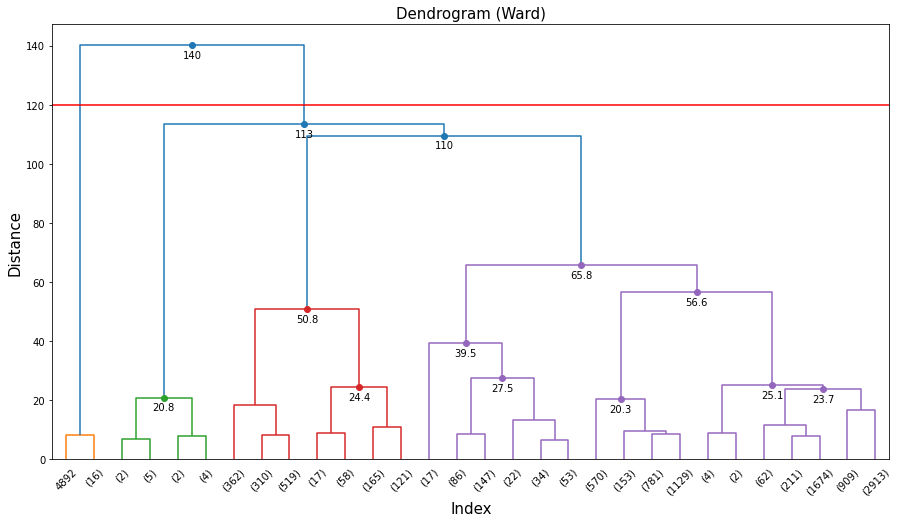

In [59]:
dendro = dendrogram(l1, p=30, truncate_mode='lastp')

for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = sum(i[1:3])/2
    y = d[1]
    if y > 20:
        plt.plot(x, y, 'o', c=c)
        plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')

plt.title('Dendrogram (Ward)', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)
plt.axhline(y=120,color='r')
plt.show()

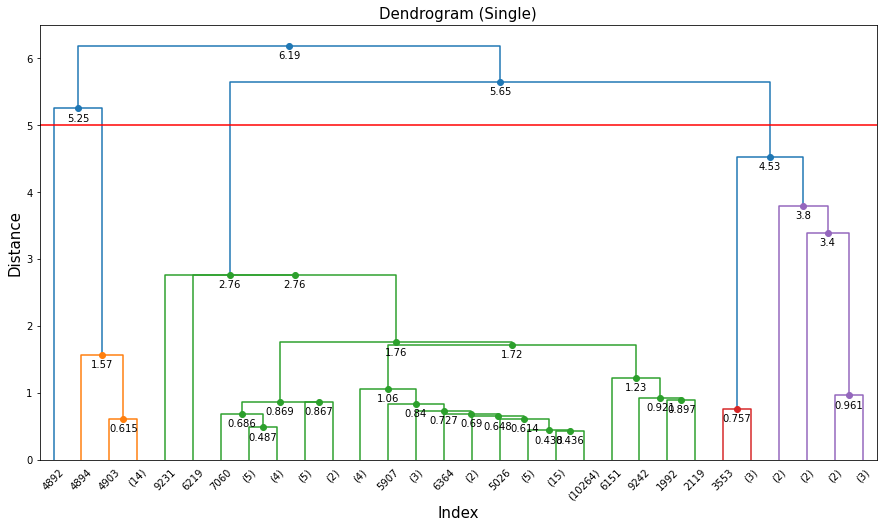

In [60]:
dendro = dendrogram(l2, p=30, truncate_mode='lastp')

for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = sum(i[1:3])/2
    y = d[1]
    if y < 20:
        plt.plot(x, y, 'o', c=c)
        plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')

plt.title('Dendrogram (Single)', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)
plt.axhline(y=5,color='r')
plt.show()

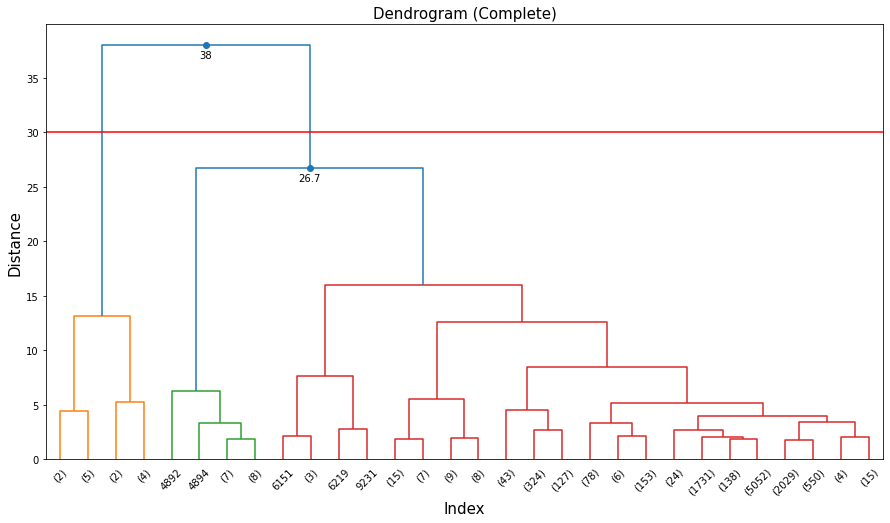

In [61]:
dendro = dendrogram(l3, p=30, truncate_mode='lastp')

for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = sum(i[1:3])/2
    y = d[1]
    if y > 20:
        plt.plot(x, y, 'o', c=c)
        plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')

plt.title('Dendrogram (Complete)', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)
plt.axhline(y=30,color='r')
plt.show()

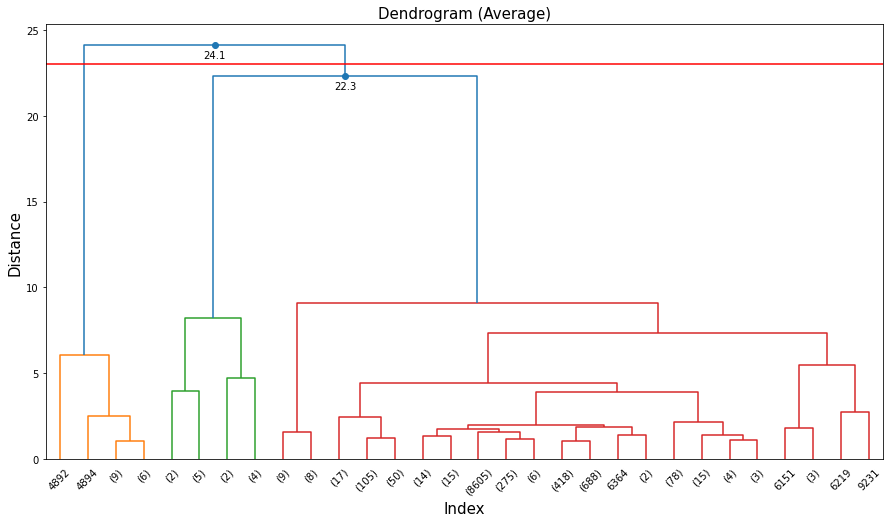

In [62]:
dendro = dendrogram(l4, p=30, truncate_mode='lastp')

for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = sum(i[1:3])/2
    y = d[1]
    if y > 20:
        plt.plot(x, y, 'o', c=c)
        plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')

plt.title('Dendrogram (Average)', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)
plt.axhline(y=23,color='r')
plt.show()

**Interpretation:** 

1) x-axis contains the observations and the y-axis contains the distances computed using the different methods. 

2) Horizontal lines show the merging of the clusters.

3) The topmost line in the dendrogram refers to a single cluster of all the data points.

The above dendrogram using `Average` linkage method shows that the number of clusters (=2) is constant from the distance 22.3 to 24.1. Thus, we can consider the value 'two' as the optimal number of clusters. The horizontal black line in the dendrogram intersects the vertical lines at two unique points. The different colors below the line correspond to the different clusters.

#### Let us calculate the Cophenetic correlation coefficient to study the quality of clusters formed using dendrogram.

In [65]:
coph_Scores={}
eucli_dist = euclidean_distances(X)
dist_array = eucli_dist[np.triu_indices(10349,k = 1)]  
coeff, cophenet_dist = cophenet(l1, dist_array)
coph_Scores['ward']=coeff
coeff1, cophenet_dist1 = cophenet(l2, dist_array)
coph_Scores['single']=coeff1
coeff2, cophenet_dist2 = cophenet(l3, dist_array)
coph_Scores['complete']=coeff2  
coeff3, cophenet_dist3 = cophenet(l4, dist_array)
coph_Scores['average']=coeff3
coeff4, cophenet_dist4 = cophenet(l5, dist_array)
coph_Scores['weighted']=coeff4
coeff5, cophenet_dist5 = cophenet(l6, dist_array)
coph_Scores['centroid']=coeff5
coeff6, cophenet_dist6 = cophenet(l7, dist_array)
coph_Scores['median']=coeff6
print(coph_Scores)

{'ward': 0.4107754283477867, 'single': 0.8695822333724786, 'complete': 0.8716036346684618, 'average': 0.9592833877909347, 'weighted': 0.8448728110212427, 'centroid': 0.9579785600692731, 'median': 0.9009206188038626}


## Silhouette Scores - bar graph

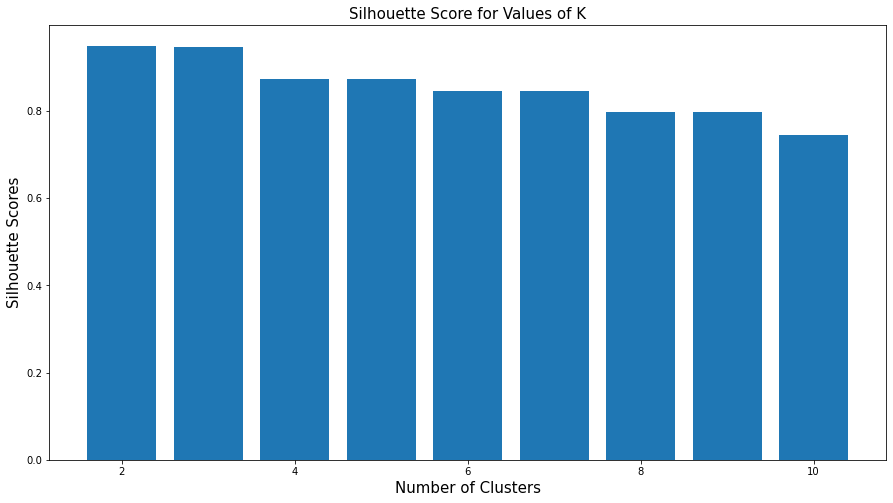

In [64]:
K = [2,3,4,5,6,7,8,9,10]
silhouette_scores = [] 
for i in K:
    model = AgglomerativeClustering(n_clusters = i,linkage='average') 
    silhouette_scores.append(silhouette_score(X, model.fit_predict(X))) 
plt.bar(K, silhouette_scores) 
plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 15) 
plt.ylabel('Silhouette Scores', fontsize = 15)
plt.show()

**Interpretation:** The above plot shows that the Silhouette score for K =2 is the highest. This imlpies that K = 2 is the optimal value for number of clusters.

Both the dendrogram and Silhouette score method returns K = 2 as the optimal value for the number of clusters. Now we retrieve the clusters and let us visualize the data.

## Build the Clusters

In [65]:
clusters = AgglomerativeClustering(n_clusters=2, linkage='average')
clusters.fit(X)

AgglomerativeClustering(linkage='average')

In [66]:
df_prod=df_sp.copy()
df_prod['Cluster'] = clusters.labels_
df_prod.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Cluster
App,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19MB,"10,000+",Free,0.0,Everyone,Art & Design,0
Coloring book moana,3.9,967,14MB,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",4.7,87510,8.7MB,"5,000,000+",Free,0.0,Everyone,Art & Design,0
Sketch - Draw & Paint,4.5,215644,25MB,"50,000,000+",Free,0.0,Teen,Art & Design,0
Pixel Draw - Number Art Coloring Book,4.3,967,2.8MB,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,0


In [67]:
df_prod['Cluster'].value_counts()

0    10332
1       17
Name: Cluster, dtype: int64

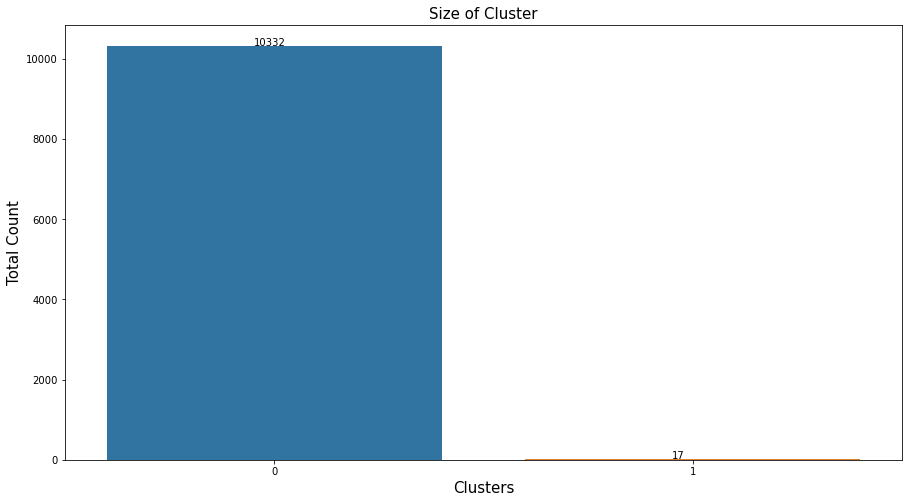

In [68]:
sns.countplot(data= df_prod, x = 'Cluster')
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Total Count', fontsize = 15)
plt.text(x = -0.05, y =10332, s = np.unique(clusters.labels_, return_counts=True)[1][0])
plt.text(x = 0.95, y =17, s = np.unique(clusters.labels_, return_counts=True)[1][1])
plt.show()

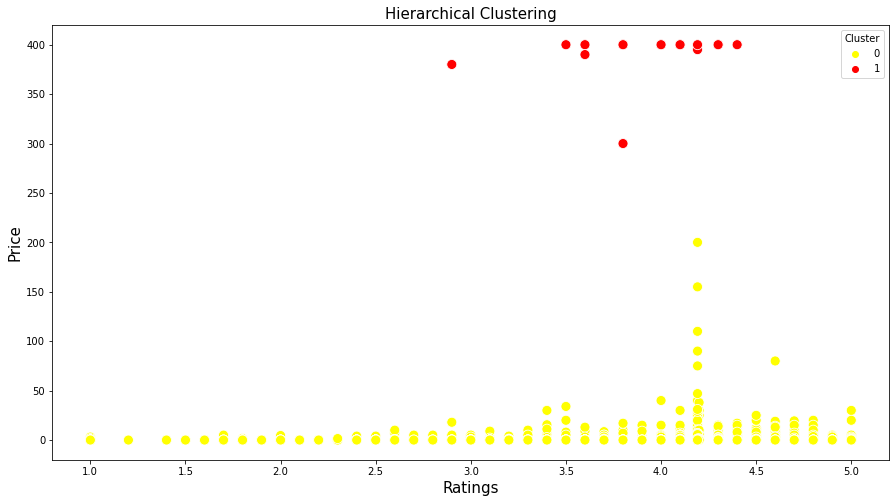

In [69]:
sns.scatterplot(x = 'Rating', y = 'Price', data = df_prod, hue = 'Cluster',s=100,palette=['yellow','red'])
plt.title('Hierarchical Clustering', fontsize = 15)
plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

**Interpretation:** The largest cluster is shown by the yellow color in the above plot.


## Analyse the Cluster

### Cluster 1

In [70]:
df_prod['Cluster'].value_counts()[0]

10332

In [71]:
df_prod[df_prod.Cluster == 0].head(10)

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Cluster
App,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19MB,"10,000+",Free,0.0,Everyone,Art & Design,0
Coloring book moana,3.9,967,14MB,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",4.7,87510,8.7MB,"5,000,000+",Free,0.0,Everyone,Art & Design,0
Sketch - Draw & Paint,4.5,215644,25MB,"50,000,000+",Free,0.0,Teen,Art & Design,0
Pixel Draw - Number Art Coloring Book,4.3,967,2.8MB,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,0
Paper flowers instructions,4.4,167,5.6MB,"50,000+",Free,0.0,Everyone,Art & Design,0
Smoke Effect Photo Maker - Smoke Editor,3.8,178,19MB,"50,000+",Free,0.0,Everyone,Art & Design,0
Infinite Painter,4.1,36815,29MB,"1,000,000+",Free,0.0,Everyone,Art & Design,0
Garden Coloring Book,4.4,13791,33MB,"1,000,000+",Free,0.0,Everyone,Art & Design,0


In [72]:
df_prod[df_prod.Cluster==0].describe()

,Rating,Reviews,Price,Cluster
count,10332.000000,1.033200e+04,10332.000000,10332.0
mean,4.188709,4.064071e+05,0.387647,0.0
std,0.484164,2.699681e+06,3.564888,0.0
min,1.000000,0.000000e+00,0.000000,0.0
25%,4.100000,3.200000e+01,0.000000,0.0
50%,4.200000,1.688500e+03,0.000000,0.0
75%,4.500000,4.643825e+04,0.000000,0.0
max,5.000000,7.815831e+07,200.000000,0.0


In [73]:
df_prod[df_prod.Cluster==0].index.value_counts()

ROBLOX                            8
8 Ball Pool                       7
Helix Jump                        6
Bubble Shooter                    6
Zombie Catchers                   6
                                 ..
CF SPOT                           1
DG Card                           1
Free DS Emulator                  1
CV-RECORD Pro                     1
FREE Stock Market Trading Tips    1
Name: App, Length: 9642, dtype: int64

In [74]:
df_prod[df_prod.Cluster==0].Genres.value_counts()

Tools                         841
Entertainment                 583
Education                     526
Business                      427
Medical                       408
                             ... 
Role Playing;Education          1
Lifestyle;Pretend Play          1
Racing;Pretend Play             1
Health & Fitness;Education      1
Communication;Creativity        1
Name: Genres, Length: 119, dtype: int64

In [75]:
df_prod[df_prod.Cluster==0]['Content Rating'].value_counts()

Everyone           8360
Teen               1144
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

**Interpretation:** The above output shows that the majority of the Apps in this cluster are of the `Tools`,`Entertainment` and `Business` genres. Most of the Apps in this Cluster are for Everyone.


### Cluster 2

In [76]:
df_prod['Cluster'].value_counts()[1]

17

In [77]:
df_prod[df_prod.Cluster == 1]

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Cluster
App,,,,,,,,,
most expensive app (H),4.300000,6,1.5MB,100+,Paid,399.99,Everyone,Entertainment,1
💎 I'm rich,3.800000,718,26MB,"10,000+",Paid,399.99,Everyone,Lifestyle,1
I'm Rich - Trump Edition,3.600000,275,7.3MB,"10,000+",Paid,400.00,Everyone,Lifestyle,1
I am rich,3.800000,3547,1.8MB,"100,000+",Paid,399.99,Everyone,Lifestyle,1
I am Rich Plus,4.000000,856,8.7MB,"10,000+",Paid,399.99,Everyone,Entertainment,1
I am rich VIP,3.800000,411,2.6MB,"10,000+",Paid,299.99,Everyone,Lifestyle,1
I Am Rich Premium,4.100000,1867,4.7MB,"50,000+",Paid,399.99,Everyone,Finance,1
I am extremely Rich,2.900000,41,2.9MB,"1,000+",Paid,379.99,Everyone,Lifestyle,1
I am Rich!,3.800000,93,22MB,"1,000+",Paid,399.99,Everyone,Finance,1


In [78]:
df_prod[df_prod.Cluster==1].describe()

,Rating,Reviews,Price,Cluster
count,17.000000,17.000000,17.000000,17.0
mean,3.904913,532.294118,392.049412,1.0
std,0.372478,905.329758,24.306764,0.0
min,2.900000,0.000000,299.990000,1.0
25%,3.800000,41.000000,399.990000,1.0
50%,4.000000,201.000000,399.990000,1.0
75%,4.191757,472.000000,399.990000,1.0
max,4.400000,3547.000000,400.000000,1.0


In [79]:
df_prod[df_prod.Cluster==1].index.value_counts()

I Am Rich                            1
Eu Sou Rico                          1
I'm Rich - Trump Edition             1
I am extremely Rich                  1
most expensive app (H)               1
I Am Rich Premium                    1
I am rich                            1
I am Rich!                           1
I'm Rich/Eu sou Rico/أنا غني/我很有錢    1
I am rich(premium)                   1
I AM RICH PRO PLUS                   1
I am rich VIP                        1
I am Rich Plus                       1
💎 I'm rich                           1
I Am Rich Pro                        1
I am Rich                            1
I am rich (Most expensive app)       1
Name: App, dtype: int64

In [80]:
df_prod[df_prod.Cluster==1].Genres.value_counts()

Finance          7
Lifestyle        6
Entertainment    4
Name: Genres, dtype: int64

In [81]:
df_prod[df_prod.Cluster==1]['Content Rating'].value_counts()

Everyone    16
Teen         1
Name: Content Rating, dtype: int64

In [82]:
df_prod[df_prod.Cluster==1]['Type'].value_counts()

Paid    17
Name: Type, dtype: int64

**Interpretation:** The above output shows that the majority of the Apps in this cluster are `Finance` and `Lifestyle` genres.All the Apps in the cluster are Paid Apps.


## DBSCAN

DBSCAN is a density-based clustering method. We do not need to provide the required number of clusters to the algorithm.

Let us cluster the scaled data.

In [83]:
model = DBSCAN(eps = 0.8, min_samples = 1000)
model.fit(X)

DBSCAN(eps=0.8, min_samples=1000)

In [84]:
(set(model.labels_))

{-1, 0}

**Interpretation**: From the above output we can see that the DBSCAN algorithm has created 2 clusters. The data points labeled as `-1` are the `outliers` identified by DBSCAN.

In [85]:
df_prod['Cluster_DBSCAN'] = model.labels_
df_prod.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Cluster,Cluster_DBSCAN
App,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19MB,"10,000+",Free,0.0,Everyone,Art & Design,0,0
Coloring book moana,3.9,967,14MB,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,0,0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",4.7,87510,8.7MB,"5,000,000+",Free,0.0,Everyone,Art & Design,0,0
Sketch - Draw & Paint,4.5,215644,25MB,"50,000,000+",Free,0.0,Teen,Art & Design,0,0
Pixel Draw - Number Art Coloring Book,4.3,967,2.8MB,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,0,0


In [86]:
df_prod['Cluster_DBSCAN'].value_counts()

 0    9643
-1     706
Name: Cluster_DBSCAN, dtype: int64

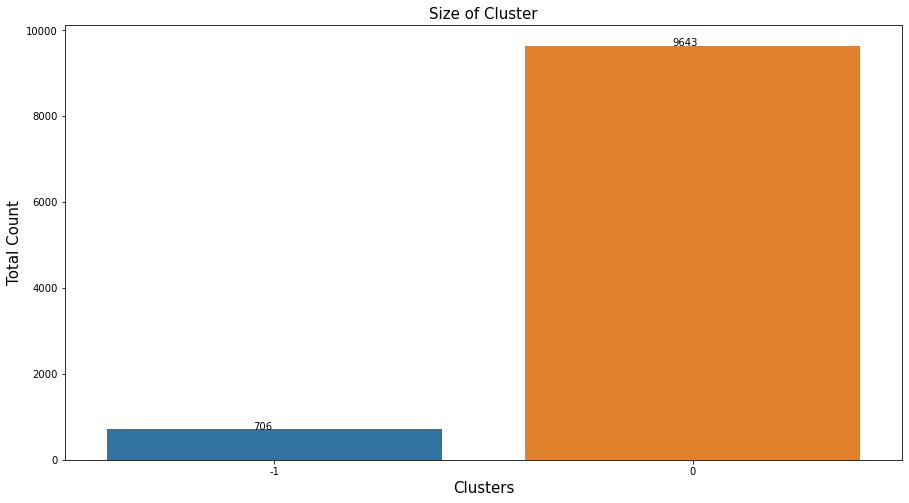

In [87]:
sns.countplot(data= df_prod, x = 'Cluster_DBSCAN')
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Total Count', fontsize = 15)
plt.text(x = -0.05, y =706, s = np.unique(model.labels_, return_counts=True)[1][0])
plt.text(x = 0.95, y =9643, s = np.unique(model.labels_, return_counts=True)[1][1])
plt.show()

**Interpretation**: From the above output we can see that a cluster with 9643 is the largest cluster and other clusters are very small. 

Now let us visualize the clusters.We consider only the variables `Rating` and `Reviews` to visualize the clusters.

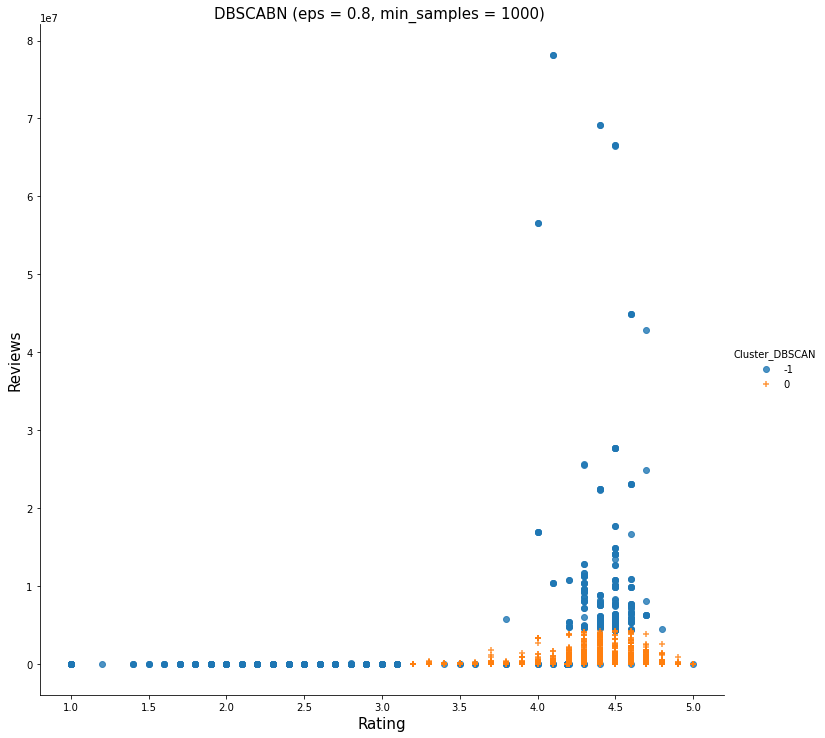

In [88]:
sns.lmplot(x = 'Rating', y = 'Reviews', data = df_prod, hue = 'Cluster_DBSCAN', markers = ['o','+'], 
           fit_reg = False, size = 10)
plt.title('DBSCABN (eps = 0.8, min_samples = 1000) ', fontsize = 15)
plt.xlabel('Rating', fontsize = 15)
plt.ylabel('Reviews', fontsize = 15)
plt.show()

**Interpretation:** The above plot shows the clusters created by DBSCAN. The blue circles correspond to the outliers and the observations in the largest cluster are denoted by the orange '+'. Other clusters are too small compared to the largest cluster.

We can see some of the points are overlapped. This is because the dimension of the original data is greater than 2 and we have considered only 2 variables to plot the clusters.

Now let us check the products belonging to each cluster.

### Cluster 1

In [89]:
df_prod[df_prod.Cluster_DBSCAN==0].index.value_counts()

Bubble Shooter                      6
Helix Jump                          6
Zombie Catchers                     6
Granny                              5
Bowmasters                          5
                                   ..
M-Files                             1
Jaumo Dating, Flirt & Live Video    1
DW Streaming                        1
Hovercraft Racer                    1
FREE Stock Market Trading Tips      1
Name: App, Length: 9096, dtype: int64

In [90]:
df_prod[df_prod.Cluster_DBSCAN==0]['Genres'].value_counts()

Tools                                  761
Entertainment                          545
Education                              504
Business                               398
Productivity                           387
                                      ... 
Casual;Music & Video                     1
Books & Reference;Creativity             1
Travel & Local;Action & Adventure        1
Role Playing;Brain Games                 1
Health & Fitness;Action & Adventure      1
Name: Genres, Length: 119, dtype: int64

In [91]:
df_prod[df_prod.Cluster_DBSCAN==0]['Type'].value_counts()

Free    8948
Paid     695
Name: Type, dtype: int64

In [92]:
df_prod[df_prod.Cluster_DBSCAN==0]['Content Rating'].value_counts()

Everyone           7801
Teen               1082
Mature 17+          420
Everyone 10+        335
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

**Interpretation**: We can see that the 1st cluster with 9643 observations contains 20% of `Tools`,`Education` and `Entertainment` genres Apps.

### Outlier identified by DBSCAN

In [93]:
df_prod[df_prod.Cluster_DBSCAN==-1].index.value_counts()

ROBLOX                            8
8 Ball Pool                       7
Candy Crush Saga                  5
Duolingo: Learn Languages Free    5
Farm Heroes Saga                  5
                                 ..
abeoCoder                         1
Outdoor Movies BC                 1
fred's Pharmacy                   1
Bg TV Online                      1
AKASO DV                          1
Name: App, Length: 564, dtype: int64

In [94]:
df_prod[df_prod.Cluster_DBSCAN==-1]['Genres'].value_counts()

Tools                           80
Entertainment                   42
Communication                   39
Lifestyle                       39
Casual                          35
Medical                         33
Finance                         33
Photography                     32
Business                        29
Arcade                          24
Action                          23
Education                       22
Sports                          22
Health & Fitness                22
Productivity                    20
Social                          19
Travel & Local                  18
News & Magazines                17
Video Players & Editors         16
Dating                          15
Shopping                        15
Strategy                        14
Maps & Navigation               13
Personalization                  9
Racing                           8
Adventure;Action & Adventure     8
Education;Education              7
Simulation                       7
Food & Drink        

In [95]:
df_prod[df_prod.Cluster_DBSCAN==-1]['Content Rating'].value_counts()

Everyone        575
Teen             63
Everyone 10+     41
Mature 17+       27
Name: Content Rating, dtype: int64

**Interpretation**: We can see that the algorithm has identified most of the `Entertainment`, `Casual`, `Tools`,`Communication` and `Lifestyle` Apps as the outliers.

Here we can see that the Agglomerative clustering has grouped the Apps like hierarchical clustering. Thus we can conclude that the DBSCAN algorithm is working good on this dataset.

<a id='dimension'></a>
# 5. Dimensionality Reduction

## Principle Component Analysis

In [96]:
df_num=df_prod.drop(['Cluster','Cluster_DBSCAN'],axis=1).select_dtypes(exclude='object')
df_cat=df_prod.drop(['Cluster','Cluster_DBSCAN'],axis=1).select_dtypes(include='object')
df_target=df_prod['Cluster']

### Encode the categorical variables 

In [97]:
dummy=pd.get_dummies(df_cat,drop_first=True)
X_En=pd.concat([df_num,dummy],axis=1)
X_En.head()

,Rating,Reviews,Price,Size_1.1MB,Size_1.2MB,Size_1.3MB,Size_1.4MB,Size_1.5MB,Size_1.6MB,Size_1.7MB,...,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Trivia;Education,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
App,,,,,,,,,,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Coloring book moana,3.9,967,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",4.7,87510,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sketch - Draw & Paint,4.5,215644,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pixel Draw - Number Art Coloring Book,4.3,967,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Scale the Data

In [98]:
mm=MinMaxScaler()
X_Scaled=mm.fit_transform(X_En)
X=pd.DataFrame(X_Scaled,columns=X_En.columns,index=X_En.index)
X.head()

,Rating,Reviews,Price,Size_1.1MB,Size_1.2MB,Size_1.3MB,Size_1.4MB,Size_1.5MB,Size_1.6MB,Size_1.7MB,...,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Trivia;Education,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
App,,,,,,,,,,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,0.775,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Coloring book moana,0.725,0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",0.925,0.001120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sketch - Draw & Paint,0.875,0.002759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pixel Draw - Number Art Coloring Book,0.825,0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train-Test Split

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,df_target,test_size=0.3,random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7244, 607)
(3105, 607)
(7244,)
(3105,)


### Logistic Regression Model

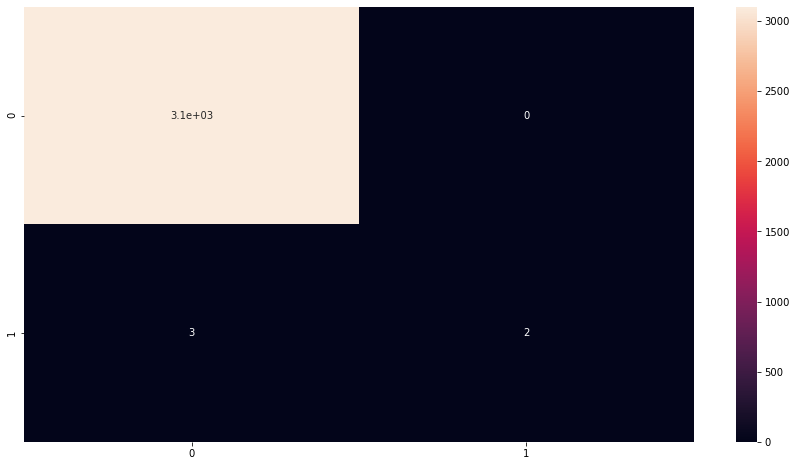

In [100]:
lr=LogisticRegression()
logreg=lr.fit(X_train,y_train)
y_pred_LR=logreg.predict(X_test)
cm=confusion_matrix(y_test,y_pred_LR)
sns.heatmap(cm,annot=True)
plt.show()

In [101]:
print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3100
           1       1.00      0.40      0.57         5

    accuracy                           1.00      3105
   macro avg       1.00      0.70      0.79      3105
weighted avg       1.00      1.00      1.00      3105



### Logistic Regression after PCA

In [102]:
pca = PCA()
X_train_2 = pca.fit_transform(X_train)
X_test_2 = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

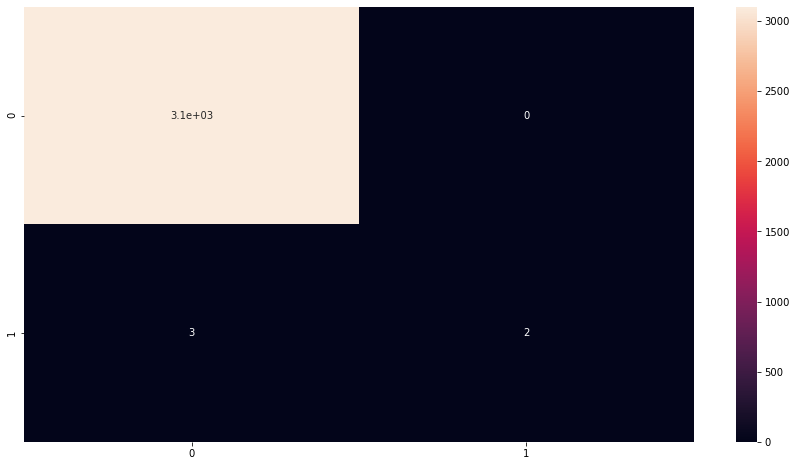

In [103]:
lr=LogisticRegression()
logreg=lr.fit(X_train_2,y_train)
y_pred_LR2=logreg.predict(X_test_2)
cm=confusion_matrix(y_test,y_pred_LR2)
sns.heatmap(cm,annot=True)
plt.show()

In [104]:
print(classification_report(y_test,y_pred_LR2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3100
           1       1.00      0.40      0.57         5

    accuracy                           1.00      3105
   macro avg       1.00      0.70      0.79      3105
weighted avg       1.00      1.00      1.00      3105



##  Linear Discriminant Analysis

### LDA before Hypertuning

In [174]:
X_train,X_test,y_train,y_test=train_test_split(X,df_target,test_size=0.3,random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7244, 607)
(3105, 607)
(7244,)
(3105,)


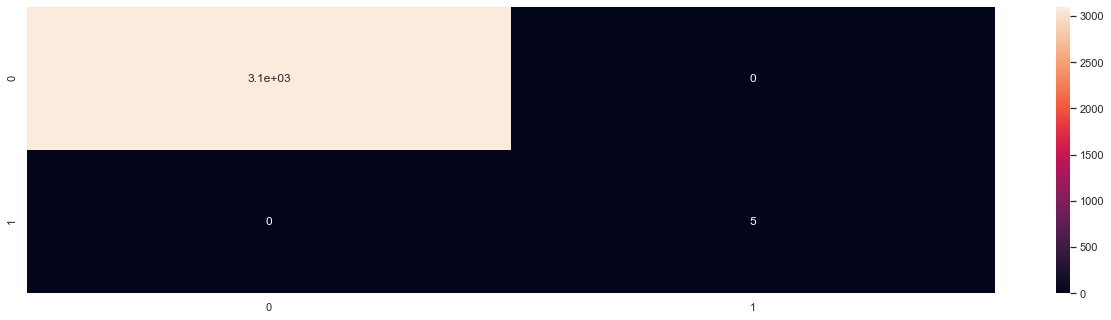

In [175]:
model = LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cm_LDA= confusion_matrix(y_test, y_pred)
sns.heatmap(cm_LDA, annot=True)
plt.show()

In [176]:
train_pred = model.predict(X_train)
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7232
           1       1.00      1.00      1.00        12

    accuracy                           1.00      7244
   macro avg       1.00      1.00      1.00      7244
weighted avg       1.00      1.00      1.00      7244



In [177]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3100
           1       1.00      1.00      1.00         5

    accuracy                           1.00      3105
   macro avg       1.00      1.00      1.00      3105
weighted avg       1.00      1.00      1.00      3105



## Kernel Principal Component Analysis

### Logistic Regression after applying Kernel PCA

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X,df_target,test_size=0.3,random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7244, 607)
(3105, 607)
(7244,)
(3105,)


In [113]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

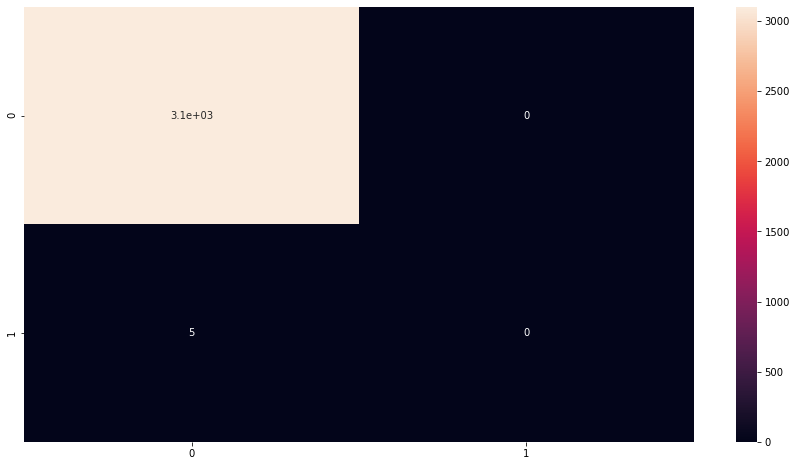

In [114]:
lr=LogisticRegression()
l2=lr.fit(X_train,y_train)
y_pred_kpca = l2.predict(X_test)
cm_kpca= confusion_matrix(y_test, y_pred_kpca)
sns.heatmap(cm_kpca, annot=True)
plt.show()

In [115]:
ac_kpca = accuracy_score(y_test, y_pred_kpca)
print("Accuracy Score:", ac_kpca)
classification_kpca=classification_report(y_test,y_pred_kpca)
print(classification_kpca)

Accuracy Score: 0.998389694041868
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3100
           1       0.00      0.00      0.00         5

    accuracy                           1.00      3105
   macro avg       0.50      0.50      0.50      3105
weighted avg       1.00      1.00      1.00      3105



### Parameter tunning in Kennel-PCA

### Logistic Regression with tuned K-PCA

In [116]:
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import KernelPCA
from sklearn import tree

kpca=KernelPCA(fit_inverse_transform=True, n_jobs=-1) 
param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid", "linear", "poly"]
    }]
grid_search = GridSearchCV(kpca, param_grid, cv=3, scoring='accuracy')
X_kpca_train = kpca.fit_transform(X_train)
X_preimage = kpca.inverse_transform(X_kpca_train)

In [117]:
mean_squared_error(X_train, X_preimage)

2.0725810424084824e-05

In [118]:
model_tune_kpca=LogisticRegression(random_state = 0)
model_tune_kpca.fit(X_kpca_train,y_train)

LogisticRegression(random_state=0)

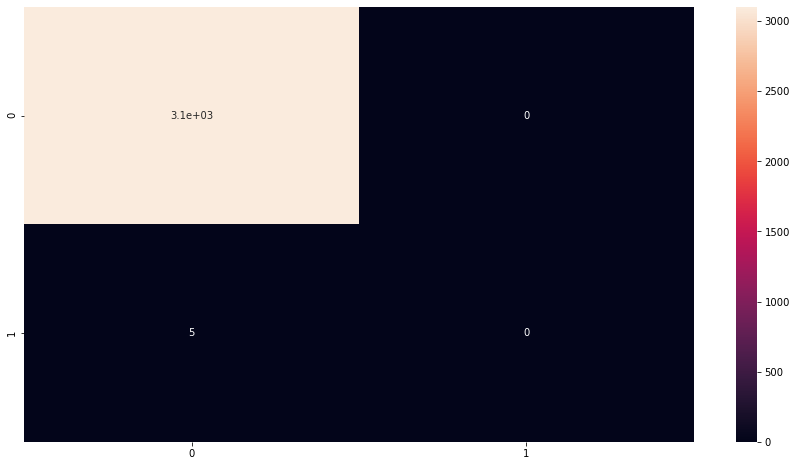

In [119]:
X_kpca_test = kpca.fit_transform(X_test)
y_pred_tkpca = model_tune_kpca.predict(X_kpca_test)
cm_kpca_tune= confusion_matrix(y_test, y_pred_tkpca)
sns.heatmap(cm_kpca_tune, annot=True)
plt.show()

In [120]:
classification_2=classification_report(y_test,y_pred_tkpca)
print(classification_2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3100
           1       0.00      0.00      0.00         5

    accuracy                           1.00      3105
   macro avg       0.50      0.50      0.50      3105
weighted avg       1.00      1.00      1.00      3105



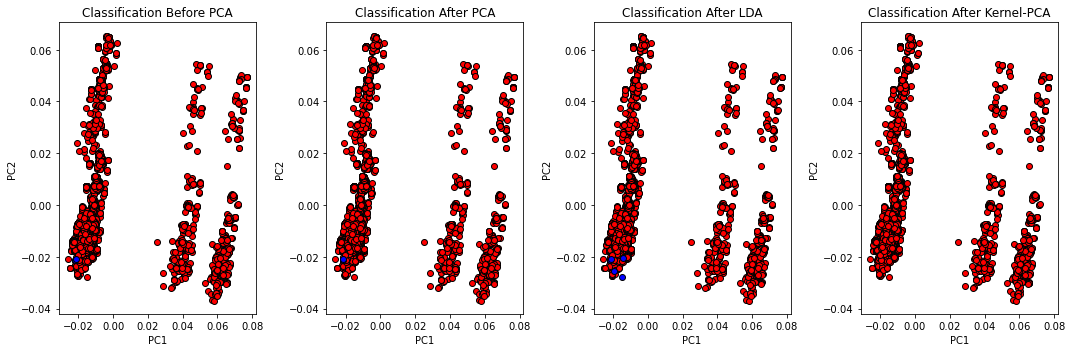

In [121]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

ax[0].scatter(X_test[:, 0][y_pred_LR == 0], X_test[:, 1][y_pred_LR == 0], c='red',alpha = 1,  edgecolor='k')
ax[0].scatter(X_test[:, 0][y_pred_LR == 1], X_test[:, 1][y_pred_LR == 1], c='blue',alpha = 1,  edgecolor='k')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('Classification Before PCA')


ax[1].scatter(X_test[:, 0][y_pred_LR2 == 0], X_test[:, 1][y_pred_LR2 == 0], c='red',alpha = 1,  edgecolor='k')
ax[1].scatter(X_test[:, 0][y_pred_LR2 == 1], X_test[:, 1][y_pred_LR2 == 1], c='blue',alpha = 1,  edgecolor='k')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('Classification After PCA')


ax[2].scatter(X_test[:, 0][y_pred == 0], X_test[:, 1][y_pred == 0], c='red',alpha = 1,  edgecolor='k')
ax[2].scatter(X_test[:, 0][y_pred == 1], X_test[:, 1][y_pred == 1], c='blue',alpha = 1,  edgecolor='k')
ax[2].set_xlabel('PC1')
ax[2].set_ylabel('PC2')
ax[2].set_title('Classification After LDA')


ax[3].scatter(X_test[:, 0][y_pred_kpca == 0], X_test[:, 1][y_pred_kpca == 0], c='red',alpha = 1,  edgecolor='k')
ax[3].scatter(X_test[:, 0][y_pred_kpca == 1], X_test[:, 1][y_pred_kpca == 1], c='blue',alpha = 1,  edgecolor='k')
ax[3].set_xlabel('PC1')
ax[3].set_ylabel('PC2')
ax[3].set_title('Classification After Kernel-PCA')
plt.tight_layout()
plt.show()

<a id="System"></a>
# 5. Recommendation System

### 1. Popularity Based Recommendation

This model is not actually personalized - it simply recommends to a user the most popular items that the user has not previously consumed i.e. even though you know the behaviour of the user you cannot recommend items accordingly.<br>


In [38]:
df.head(2)

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19MB,"10,000+",Free,0.0,Everyone,Art & Design
1,Coloring book moana,3.9,967,14MB,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play


In [39]:
average_rating = pd.DataFrame(df.groupby('App')['Rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(df.groupby('App')['Rating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,Rating,ratingCount
App,,
ROBLOX,4.500000,8
8 Ball Pool,4.500000,7
Bubble Shooter,4.483333,6
Zombie Catchers,4.700000,6
Helix Jump,4.200000,6


**Interpretation:** The output shows top 5 apps with highest Rating counts.
    
    
However, the highest average rated Apps may have not been reviewed by the users.  Hence for better recommendation, we have considered Reviews count greater than 100000 as shown below

In [40]:
popularity_table=df.groupby('App').agg({'Rating':'mean','Reviews':'mean'})
top_popularity_table=popularity_table[popularity_table['Reviews']>1000000]

In [41]:
top_popularity_table.sort_values(['Rating','Reviews'],ascending=False).head(10)

,Rating,Reviews
App,,
Period Tracker - Period Calendar Ovulation Tracker,4.8,4559407.0
"DU Recorder – Screen Recorder, Video Editor, Live",4.8,2588730.0
Eternium,4.8,1506783.0
PewDiePie's Tuber Simulator,4.8,1499466.0
Vlogger Go Viral - Tuber Game,4.8,1304467.0
Amino: Communities and Chats,4.8,1261579.5
Clean Master- Space Cleaner & Antivirus,4.7,42916526.0
"Security Master - Antivirus, VPN, AppLock, Booster",4.7,24900999.0
Piano Tiles 2™,4.7,8118880.0


**Interpretation:** Top 10 Apps Recommendation based on Popularity. The popular app downloaded by android users is `Period Tracker - 
    Period Calendar Ovulation Tracker`, this app holds highest rating with low number of reviews although the reviews of `Clean Master- Space Cleaner & Antivirus` app are high.  

## 2.Content Based Recommendation System

This method uses only information about the description and attributes of the items users has previously consumed to model users preferences. In other words, these algorithms try to recommend items that are similar to those that a user liked in the past (or is examining in the present). In particular, various candidate items are compared with items previously rated by the user and the best-matching items are recommended..<br>

In [126]:
cat=df['Genres'].str.split(';',expand=True)
cat=cat.iloc[:,0:2]

In [127]:
cat=cat.fillna('Others')
cat.columns=['Genre1','Genre2']
cat.head()

,Genre1,Genre2
0,Art & Design,Others
1,Art & Design,Pretend Play
2,Art & Design,Others
3,Art & Design,Others
4,Art & Design,Creativity


In [128]:
df1=pd.concat([df,cat],axis=1)
df1=df1.drop('Genres',axis=1)
df1=df1.drop_duplicates()
df1=df1.set_index('App')
df1.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genre1,Genre2
App,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19MB,"10,000+",Free,0.0,Everyone,Art & Design,Others
Coloring book moana,3.9,967,14MB,"500,000+",Free,0.0,Everyone,Art & Design,Pretend Play
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",4.7,87510,8.7MB,"5,000,000+",Free,0.0,Everyone,Art & Design,Others
Sketch - Draw & Paint,4.5,215644,25MB,"50,000,000+",Free,0.0,Teen,Art & Design,Others
Pixel Draw - Number Art Coloring Book,4.3,967,2.8MB,"100,000+",Free,0.0,Everyone,Art & Design,Creativity


In [129]:
df2=pd.get_dummies(df1)
df2=df2.dropna()
df2.head()

,Rating,Reviews,Price,Size_1.0MB,Size_1.1MB,Size_1.2MB,Size_1.3MB,Size_1.4MB,Size_1.5MB,Size_1.6MB,...,Genre1_Video Players & Editors,Genre1_Weather,Genre1_Word,Genre2_Action & Adventure,Genre2_Brain Games,Genre2_Creativity,Genre2_Education,Genre2_Music & Video,Genre2_Others,Genre2_Pretend Play
App,,,,,,,,,,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Coloring book moana,3.9,967,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",4.7,87510,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Sketch - Draw & Paint,4.5,215644,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Pixel Draw - Number Art Coloring Book,4.3,967,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [130]:
rec_model = NearestNeighbors(metric = 'cosine')
rec_model.fit(df2)

NearestNeighbors(metric='cosine')

In [131]:
query_app_index=200
dist, ind = rec_model.kneighbors(df2.iloc[query_app_index, :].values.reshape(1, -1), n_neighbors = 6)

In [132]:
list(df2.index[ind[0]])[1:]

['My Study Life - School Planner',
 'Mobile Doc Scanner (MDScan) Lite',
 'ReadEra – free ebook reader',
 'Kariyer.net',
 'Genius Scan - PDF Scanner']

In [133]:
for i in range(0, len(dist[0])):
    if i == 0:
        print('Top 5 Recommendations for the user who used the App :',df2.index[query_app_index])
    else:
        print(i, df2.index[ind[0][i]])

Top 5 Recommendations for the user who used the App : SuperLivePro
1 My Study Life - School Planner
2 Mobile Doc Scanner (MDScan) Lite
3 ReadEra – free ebook reader
4 Kariyer.net
5 Genius Scan - PDF Scanner


**Interpretation:** From the above output, it can be seen that the 5 apps recommendations has been given for the `SuperLivePro` app

# Market Basket - Analysis

Market Basket Analysis is the process of discovering frequent item sets in large transactional database.

## Association Rules using Apriori Algorithm:

In [152]:
df1[['Genre1','Genre2']].nunique()

Genre1    48
Genre2     7
dtype: int64

In [153]:
unique_row_items = []
for index, row in df1[['Genre1','Genre2']].iterrows():
    items_series = list(row.str.split(','))
    for item_serie in items_series:
        for item in item_serie:
            if item not in unique_row_items:
                unique_row_items.append(item)

unique_row_items

['Art & Design',
 'Others',
 'Pretend Play',
 'Creativity',
 'Action & Adventure',
 'Auto & Vehicles',
 'Beauty',
 'Books & Reference',
 'Business',
 'Comics',
 'Communication',
 'Dating',
 'Education',
 'Music & Video',
 'Brain Games',
 'Entertainment',
 'Events',
 'Finance',
 'Food & Drink',
 'Health & Fitness',
 'House & Home',
 'Libraries & Demo',
 'Lifestyle',
 'Adventure',
 'Arcade',
 'Casual',
 'Card',
 'Action',
 'Strategy',
 'Puzzle',
 'Sports',
 'Music',
 'Word',
 'Racing',
 'Simulation',
 'Board',
 'Trivia',
 'Role Playing',
 'Educational',
 'Music & Audio',
 'Video Players & Editors',
 'Medical',
 'Social',
 'Shopping',
 'Photography',
 'Travel & Local',
 'Tools',
 'Personalization',
 'Productivity',
 'Parenting',
 'Weather',
 'News & Magazines',
 'Maps & Navigation',
 'Casino']

### Building Apriori Algorithm

In [154]:
te=TransactionEncoder()
te_ar=te.fit_transform(unique_row_items)

In [155]:
df2=pd.DataFrame(te_ar)
df2

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,True,True,True,False,False,True,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
4,True,True,True,False,False,False,False,False,False,False,...,True,False,True,False,True,True,True,False,False,False
5,True,True,True,False,False,False,False,False,False,False,...,True,False,False,True,True,True,False,False,False,False
6,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,True,False
7,True,True,False,True,False,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False
8,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
9,False,False,False,False,True,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False


In [156]:
df2=df2.replace({True:1,False:0})
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,1,1,1,0,0,1,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
4,1,1,1,0,0,0,0,0,0,0,...,1,0,1,0,1,1,1,0,0,0


In [157]:
df_apriori=df2.T
df_apriori.columns=unique_row_items
df_apriori

,Art & Design,Others,Pretend Play,Creativity,Action & Adventure,Auto & Vehicles,Beauty,Books & Reference,Business,Comics,...,Photography,Travel & Local,Tools,Personalization,Productivity,Parenting,Weather,News & Magazines,Maps & Navigation,Casino
0,1,0,1,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
1,1,0,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
2,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
df_apriori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Art & Design             43 non-null     int64
 1   Others                   43 non-null     int64
 2   Pretend Play             43 non-null     int64
 3   Creativity               43 non-null     int64
 4   Action & Adventure       43 non-null     int64
 5   Auto & Vehicles          43 non-null     int64
 6   Beauty                   43 non-null     int64
 7   Books & Reference        43 non-null     int64
 8   Business                 43 non-null     int64
 9   Comics                   43 non-null     int64
 10  Communication            43 non-null     int64
 11  Dating                   43 non-null     int64
 12  Education                43 non-null     int64
 13  Music & Video            43 non-null     int64
 14  Brain Games              43 non-null     int64
 15  Entertai

In [159]:
freq_items = apriori(df_apriori, min_support = 0.2, use_colnames = True, verbose =1)

Processing 93 combinations | Sampling itemset size 3


In [160]:
freq_items

,support,itemsets
0,0.255814,(Art & Design)
1,0.232558,(Pretend Play)
2,0.302326,(Action & Adventure)
3,0.302326,(Auto & Vehicles)
4,0.279070,(Books & Reference)
5,0.209302,(Communication)
6,0.209302,(Education)
7,0.255814,(Music & Video)
8,0.232558,(Brain Games)
9,0.232558,(Food & Drink)


In [161]:
freq_items.head()

,support,itemsets
0,0.255814,(Art & Design)
1,0.232558,(Pretend Play)
2,0.302326,(Action & Adventure)
3,0.302326,(Auto & Vehicles)
4,0.279070,(Books & Reference)


### Building Assosciation Rules

In [162]:
df_association_rules = association_rules(freq_items, metric = "support", min_threshold = 0.2)
df_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Video Players & Editors),(Pretend Play),0.348837,0.232558,0.209302,0.600000,2.580000,0.128177,1.918605
1,(Pretend Play),(Video Players & Editors),0.232558,0.348837,0.209302,0.900000,2.580000,0.128177,6.511628
2,(Action & Adventure),(Auto & Vehicles),0.302326,0.302326,0.209302,0.692308,2.289941,0.117902,2.267442
3,(Auto & Vehicles),(Action & Adventure),0.302326,0.302326,0.209302,0.692308,2.289941,0.117902,2.267442
4,(Music & Video),(Auto & Vehicles),0.255814,0.302326,0.209302,0.818182,2.706294,0.131963,3.837209
5,(Auto & Vehicles),(Music & Video),0.302326,0.255814,0.209302,0.692308,2.706294,0.131963,2.418605
6,(Video Players & Editors),(Auto & Vehicles),0.348837,0.302326,0.209302,0.600000,1.984615,0.103840,1.744186
7,(Auto & Vehicles),(Video Players & Editors),0.302326,0.348837,0.209302,0.692308,1.984615,0.103840,2.116279
8,(Education),(Educational),0.209302,0.232558,0.209302,1.000000,4.300000,0.160627,inf
9,(Educational),(Education),0.232558,0.209302,0.209302,0.900000,4.300000,0.160627,7.906977


In [ ]:
df_association_rules.sort_values("confidence",ascending=False)

In [ ]:
f_association_rules["antecedents"].apply(lambda x: str(x))

In [ ]:
cols = ['antecedents','consequents']
df_association_rules[cols] = df_association_rules[cols].applymap(lambda x: tuple(x))
print (df_association_rules)

In [163]:
df_association_rules = (df_association_rules.explode('antecedents')
         .reset_index(drop=True)
         .explode('consequents')
         .reset_index(drop=True))
df_association_rules["category_group"] = df_association_rules["antecedents"].apply(lambda x: str(x)) + "," + df_association_rules["consequents"].apply(lambda x: str(x))

In [164]:
df_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,category_group
0,(Video Players & Editors),(Pretend Play),0.348837,0.232558,0.209302,0.600000,2.580000,0.128177,1.918605,"frozenset({'Video Players & Editors'}),frozens..."
1,(Pretend Play),(Video Players & Editors),0.232558,0.348837,0.209302,0.900000,2.580000,0.128177,6.511628,"frozenset({'Pretend Play'}),frozenset({'Video ..."
2,(Action & Adventure),(Auto & Vehicles),0.302326,0.302326,0.209302,0.692308,2.289941,0.117902,2.267442,"frozenset({'Action & Adventure'}),frozenset({'..."
3,(Auto & Vehicles),(Action & Adventure),0.302326,0.302326,0.209302,0.692308,2.289941,0.117902,2.267442,"frozenset({'Auto & Vehicles'}),frozenset({'Act..."
4,(Music & Video),(Auto & Vehicles),0.255814,0.302326,0.209302,0.818182,2.706294,0.131963,3.837209,"frozenset({'Music & Video'}),frozenset({'Auto ..."
5,(Auto & Vehicles),(Music & Video),0.302326,0.255814,0.209302,0.692308,2.706294,0.131963,2.418605,"frozenset({'Auto & Vehicles'}),frozenset({'Mus..."
6,(Video Players & Editors),(Auto & Vehicles),0.348837,0.302326,0.209302,0.600000,1.984615,0.103840,1.744186,"frozenset({'Video Players & Editors'}),frozens..."
7,(Auto & Vehicles),(Video Players & Editors),0.302326,0.348837,0.209302,0.692308,1.984615,0.103840,2.116279,"frozenset({'Auto & Vehicles'}),frozenset({'Vid..."
8,(Education),(Educational),0.209302,0.232558,0.209302,1.000000,4.300000,0.160627,inf,"frozenset({'Education'}),frozenset({'Education..."
9,(Educational),(Education),0.232558,0.209302,0.209302,0.900000,4.300000,0.160627,7.906977,"frozenset({'Educational'}),frozenset({'Educati..."


In [165]:
df3 = df_association_rules.loc[:,["category_group","confidence","lift"]].sort_values("confidence",ascending=False)

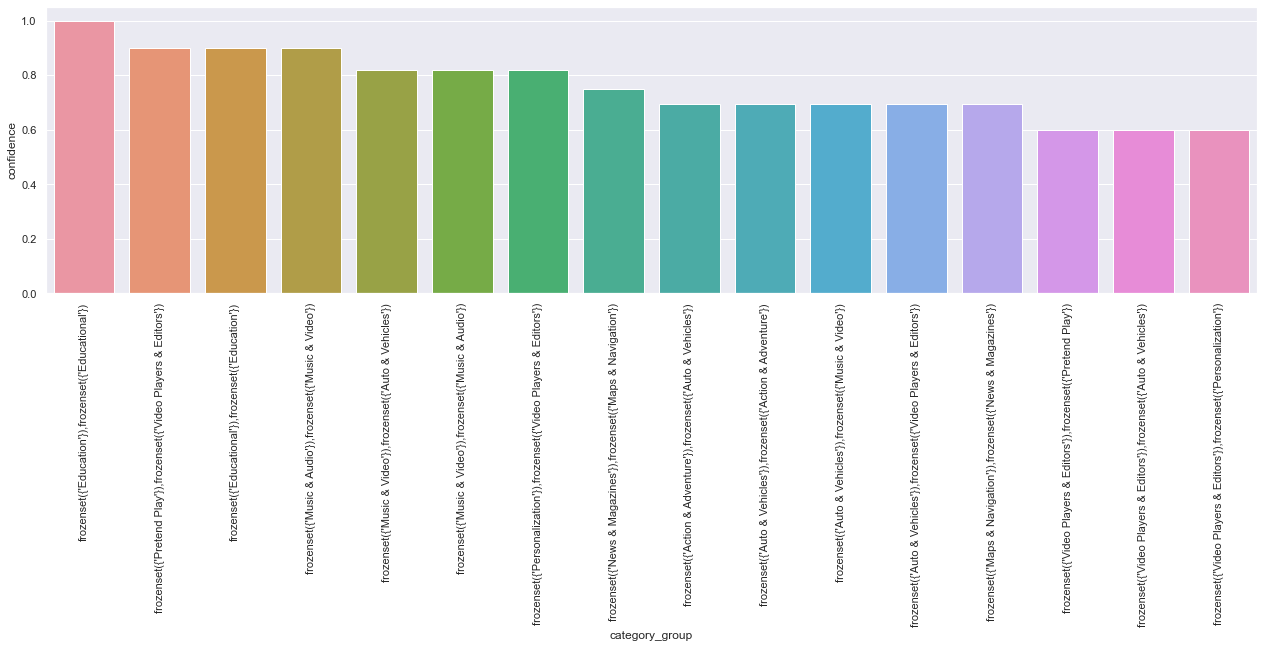

In [166]:
sns.set(font_scale=0.4) 
sns.set(rc={'figure.figsize':(21.7,5.27)})
sns.barplot(x="category_group",y="confidence",data=df3)
plt.xticks(rotation=90)
plt.show()

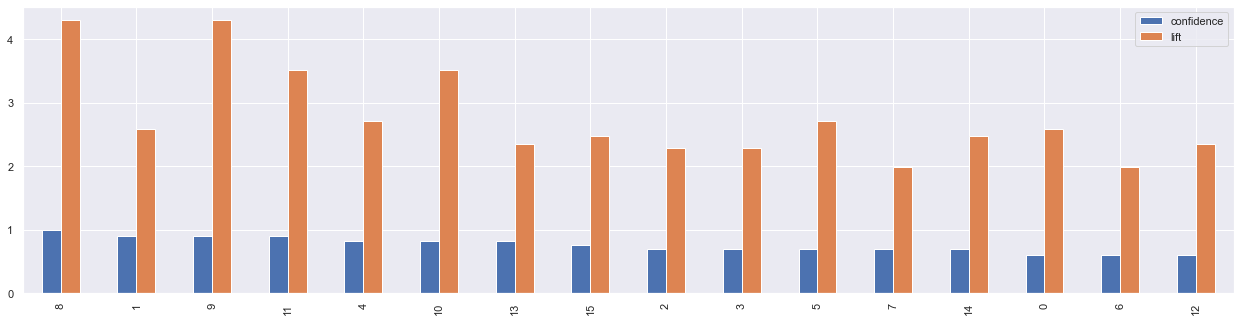

In [167]:
df3.plot.bar()
plt.show()

**Interpretation:** 

* 90% of users who download Apps of Pretend Play Genre download Video Players & Editor Apps as well.

* Pretent Play and Video Players & Editor Apps increases downloads by 2.58 times mutually.

* 75% of users who download News & Magazines Apps download it along with Maps & Navigation Apps.


<a id="con"></a>
# 6. Conclusion

We would like to conclude that the motivating factors that are helping android usres to download app from `Google PLay Store` are Ratings, Reviews, Price. Throughout the analysis, we found that the most popular category are `Family` and `Game` that are rated highly by `Everyone` and `Teens` and users have preferred to download more of free apps. Thus how when an android user downloads an app, we can recommend an app using the factors `Genres` and `Rating`.